In [1]:
import math
import xarray as xr
import cartopy.crs as crs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
from wrf import getvar, xy, interp2dxy
from wrf import to_np, getvar, CoordPair, vertcross
from matplotlib.cm import get_cmap
from matplotlib.ticker import (NullFormatter, ScalarFormatter)

In [2]:
#CURRENT DATA
cur_wrfout6 = Dataset('CUR_wrfout_d03_2018-03-25_06_00_00')
#cur_wrfout7 = Dataset('CUR_wrfout_d03_2018-03-25_07_00_00')
#cur_wrfout8 = Dataset('CUR_wrfout_d03_2018-03-25_08_00_00')
#cur_wrfout9 = Dataset('CUR_wrfout_d03_2018-03-25_09_00_00')
cur_wrfout10 = Dataset('CUR_wrfout_d03_2018-03-25_10_00_00')
cur_wrfout11= Dataset('CUR_wrfout_d03_2018-03-25_11_00_00')
cur_wrfout12 = Dataset('CUR_wrfout_d03_2018-03-25_12_00_00')
cur_wrfout13= Dataset('CUR_wrfout_d03_2018-03-25_13_00_00')
#cur_wrfout14= Dataset('CUR_wrfout_d03_2018-03-25_14_00_00')
#cur_wrfout15= Dataset('CUR_wrfout_d03_2018-03-25_15_00_00')

#cur_wrfout16 = Dataset('CUR_wrfout_d03_2018-03-25_16_00_00')
#cur_wrfout17= Dataset('CUR_wrfout_d03_2018-03-25_17_00_00')
#cur_wrfout18= Dataset('CUR_wrfout_d03_2018-03-25_18_00_00')
#cur_wrfout19= Dataset('CUR_wrfout_d03_2018-03-25_19_00_00')
#cur_wrfout20 = Dataset('CUR_wrfout_d03_2018-03-25_20_00_00')
#cur_wrfout21= Dataset('CUR_wrfout_d03_2018-03-25_21_00_00')
#cur_wrfout22= Dataset('CUR_wrfout_d03_2018-03-25_22_00_00')
#cur_wrfout23= Dataset('CUR_wrfout_d03_2018-03-25_23_00_00')
#cur_wrfout24= Dataset('CUR_wrfout_d03_2018-03-26_00_00_00')

#SST DATA
sst_wrfout6 = Dataset('SST_wrfout_d03_2018-03-25_06_00_00')
#sst_wrfout7 = Dataset('SST_wrfout_d03_2018-03-25_07_00_00')
#sst_wrfout8 = Dataset('SST_wrfout_d03_2018-03-25_08_00_00')
#sst_wrfout9 = Dataset('SST_wrfout_d03_2018-03-25_09_00_00')
sst_wrfout10 = Dataset('SST_wrfout_d03_2018-03-25_10_00_00')
sst_wrfout11 = Dataset('SST_wrfout_d03_2018-03-25_11_00_00')
sst_wrfout12 = Dataset('SST_wrfout_d03_2018-03-25_12_00_00')
sst_wrfout13 = Dataset('SST_wrfout_d03_2018-03-25_13_00_00')
#sst_wrfout14 = Dataset('SST_wrfout_d03_2018-03-25_14_00_00')
#sst_wrfout15 = Dataset('SST_wrfout_d03_2018-03-25_15_00_00')
#sst_wrfout16 = Dataset('SST_wrfout_d03_2018-03-25_16_00_00')
#sst_wrfout17 = Dataset('SST_wrfout_d03_2018-03-25_17_00_00')
#sst_wrfout18 = Dataset('SST_wrfout_d03_2018-03-25_18_00_00')
#sst_wrfout19 = Dataset('SST_wrfout_d03_2018-03-25_19_00_00')
#sst_wrfout20 = Dataset('SST_wrfout_d03_2018-03-25_20_00_00')
#sst_wrfout21 = Dataset('SST_wrfout_d03_2018-03-25_21_00_00')
#sst_wrfout22 = Dataset('SST_wrfout_d03_2018-03-25_22_00_00')
#sst_wrfout23 = Dataset('SST_wrfout_d03_2018-03-25_23_00_00')
#sst_wrfout24 = Dataset('SST_wrfout_d03_2018-03-26_00_00_00')


In [3]:
xlat =getvar(cur_wrfout6, "XLAT")
xlon = getvar(cur_wrfout6, "XLONG")
print(xlon.shape)
#print(cur_wrfout6.variables)
#south box
#26-26.6 N, -89.2- -90.4 W #67, 118
xlon1_south = np.where(xlon[400,:]>=-90.4) 
xlon2_south = np.where(xlon[400,:]<=-89.2)
lon_int_south = np.intersect1d(xlon1_south, xlon2_south)

xlat1_south = np.where(xlat[:,400]>=26.0)
xlat2_south = np.where(xlat[:,400]<=26.6)
lat_int_south = np.intersect1d(xlat1_south, xlat2_south)

#reshape lat lon array
south_lon = [xlon[400][x] for x in lon_int_south] 
south_lat = [xlat[x][400] for x in lat_int_south] 
print('south lon: ', np.array(south_lon).shape)
print('south lat: ', np.array(south_lat).shape)

#north box  #67, 167
#27.9-28.5 N, -89- -90.7 W
xlon1_north = np.where(xlon[400,:]>=-90.7) 
xlon2_north = np.where(xlon[400,:]<=-89.0)
lon_int_north = np.intersect1d(xlon1_north, xlon2_north)

xlat1_north = np.where(xlat[:,400]>=27.9)
xlat2_north = np.where(xlat[:,400]<=28.5)
lat_int_north = np.intersect1d(xlat1_north, xlat2_north)

#reshape lat lon array
north_lon = [xlon[400][x] for x in lon_int_north] 
north_lat = [xlat[x][400] for x in lat_int_north] 
print('north lon: ', np.array(north_lon).shape)
print('north lat: ', np.array(north_lat).shape)

(474, 639)
south lon:  (118,)
south lat:  (67,)
north lon:  (167,)
north lat:  (67,)


In [4]:
#Get PBLH
#Not staggered
cur_pblh_10 = getvar(cur_wrfout10, "PBLH")
cur_pblh_11 = getvar(cur_wrfout11, "PBLH")
cur_pblh_12 = getvar(cur_wrfout12, "PBLH")
cur_pblh_13 = getvar(cur_wrfout13, "PBLH")

sst_pblh_10 = getvar(sst_wrfout10, "PBLH")
sst_pblh_11 = getvar(sst_wrfout11, "PBLH")
sst_pblh_12 = getvar(sst_wrfout12, "PBLH")
sst_pblh_13 = getvar(sst_wrfout13, "PBLH")

#GET THETA 
#base pressure
sst_baseP10 = getvar(sst_wrfout10, 'P00')
sst_baseP11 = getvar(sst_wrfout11, 'P00')
sst_baseP12 = getvar(sst_wrfout12, 'P00')
sst_baseP13 = getvar(sst_wrfout13, 'P00')

cur_baseP10 = getvar(cur_wrfout10, 'P00')
cur_baseP11 = getvar(cur_wrfout11, 'P00')
cur_baseP12 = getvar(cur_wrfout12, 'P00')
cur_baseP13 = getvar(cur_wrfout13, 'P00')

#perturbation pressure
sst_pertP10 = getvar(sst_wrfout10, 'P')
sst_pertP11 = getvar(sst_wrfout11, 'P')
sst_pertP12 = getvar(sst_wrfout12, 'P')
sst_pertP13 = getvar(sst_wrfout13, 'P')

cur_pertP10 = getvar(cur_wrfout10, 'P')
cur_pertP11 = getvar(cur_wrfout11, 'P')
cur_pertP12 = getvar(cur_wrfout12, 'P')
cur_pertP13 = getvar(cur_wrfout13, 'P')

#full pressure
sst_fullP10 = sst_pertP10 + sst_baseP10
sst_fullP11 = sst_pertP11 + sst_baseP11
sst_fullP12 = sst_pertP12 + sst_baseP12
sst_fullP13 = sst_pertP13 + sst_baseP13

cur_fullP10 = cur_pertP10 + cur_baseP10
cur_fullP11 = cur_pertP11 + cur_baseP11
cur_fullP12 = cur_pertP12 + cur_baseP12
cur_fullP13 = cur_pertP13 + cur_baseP13

#potential temp. perturbation
sst_pertT10 =getvar(sst_wrfout10, 'T')
sst_pertT11 =getvar(sst_wrfout11, 'T')
sst_pertT12 =getvar(sst_wrfout12, 'T')
sst_pertT13 =getvar(sst_wrfout13, 'T')

cur_pertT10 =getvar(cur_wrfout10, 'T')
cur_pertT11 =getvar(cur_wrfout11, 'T')
cur_pertT12 =getvar(cur_wrfout12, 'T')
cur_pertT13 =getvar(cur_wrfout13, 'T')

#reference temperature 
sst_refT10 =getvar(sst_wrfout10, 'T00')
sst_refT11 =getvar(sst_wrfout11, 'T00')
sst_refT12 =getvar(sst_wrfout12, 'T00')
sst_refT13 =getvar(sst_wrfout13, 'T00')

cur_refT10 =getvar(cur_wrfout10, 'T00')
cur_refT11 =getvar(cur_wrfout11, 'T00')
cur_refT12 =getvar(cur_wrfout12, 'T00')
cur_refT13 =getvar(cur_wrfout13, 'T00')

#THETA
#theta = potentional temp. perturbation + reference temp
sst_theta10 = sst_pertT10 + sst_refT10
sst_theta11 = sst_pertT11 + sst_refT11
sst_theta12 = sst_pertT12 + sst_refT12
sst_theta13 = sst_pertT13 + sst_refT13

cur_theta10 = cur_pertT10 + cur_refT10
cur_theta11 = cur_pertT11 + cur_refT11
cur_theta12 = cur_pertT12 + cur_refT12
cur_theta13 = cur_pertT13 + cur_refT13

#Get U
cur_U_10 = getvar(cur_wrfout10, "U")
cur_U_11 = getvar(cur_wrfout11, "U")
cur_U_12 = getvar(cur_wrfout12, "U")
cur_U_13 = getvar(cur_wrfout13, "U")
cur_U_10 = wrf.destagger(cur_U_10, stagger_dim = 2)
cur_U_11  = wrf.destagger(cur_U_11, stagger_dim = 2)
cur_U_12 = wrf.destagger(cur_U_12, stagger_dim = 2)
cur_U_13  = wrf.destagger(cur_U_13, stagger_dim = 2)

cur_U10_10 = getvar(cur_wrfout10, "U10")
cur_U10_11 = getvar(cur_wrfout11, "U10")
cur_U10_12 = getvar(cur_wrfout12, "U10")
cur_U10_13 = getvar(cur_wrfout13, "U10")

sst_U_10 = getvar(sst_wrfout10, "U")
sst_U_11 = getvar(sst_wrfout11, "U")
sst_U_12 = getvar(sst_wrfout12, "U")
sst_U_13 = getvar(sst_wrfout13, "U")
sst_U_10 = wrf.destagger(sst_U_10, stagger_dim = 2)
sst_U_11  = wrf.destagger(sst_U_11, stagger_dim = 2)
sst_U_12 = wrf.destagger(sst_U_12, stagger_dim = 2)
sst_U_13  = wrf.destagger(sst_U_13, stagger_dim = 2)

sst_U10_10 = getvar(sst_wrfout10, "U10")
sst_U10_11 = getvar(sst_wrfout11, "U10")
sst_U10_12 = getvar(sst_wrfout12, "U10")
sst_U10_13 = getvar(sst_wrfout13, "U10")

cur_V_10 = getvar(cur_wrfout10, "V")
cur_V_11 = getvar(cur_wrfout11, "V")
cur_V_12 = getvar(cur_wrfout12, "V")
cur_V_13 = getvar(cur_wrfout13, "V")
cur_V_10 = wrf.destagger(cur_V_10, stagger_dim = 1)
cur_V_11  = wrf.destagger(cur_V_11, stagger_dim = 1)
cur_V_12 = wrf.destagger(cur_V_12, stagger_dim = 1)
cur_V_13  = wrf.destagger(cur_V_13, stagger_dim = 1)

cur_V10_10 = getvar(cur_wrfout10, "V10")
cur_V10_11 = getvar(cur_wrfout11, "V10")
cur_V10_12 = getvar(cur_wrfout12, "V10")
cur_V10_13 = getvar(cur_wrfout13, "V10")

sst_V_10 = getvar(sst_wrfout10, "V")
sst_V_11 = getvar(sst_wrfout11, "V")
sst_V_12 = getvar(sst_wrfout12, "V")
sst_V_13 = getvar(sst_wrfout13, "V")
sst_V_10 = wrf.destagger(sst_V_10, stagger_dim = 1)
sst_V_11  = wrf.destagger(sst_V_11, stagger_dim = 1)
sst_V_12 = wrf.destagger(sst_V_12, stagger_dim = 1)
sst_V_13  = wrf.destagger(sst_V_13, stagger_dim = 1)

sst_V10_10 = getvar(sst_wrfout10, "V10")
sst_V10_11 = getvar(sst_wrfout11, "V10")
sst_V10_12 = getvar(sst_wrfout12, "V10")
sst_V10_13 = getvar(sst_wrfout13, "V10")



In [5]:
#AVG SFC VORT
cur_U10_N = np.mean( np.array([cur_U10_11, cur_U10_12, cur_U10_13]), axis=0 )
cur_V10_N = np.mean( np.array([cur_V10_11, cur_V10_12, cur_V10_13]), axis=0 )
sst_U10_N = np.mean( np.array([sst_U10_11, sst_U10_12, sst_U10_13]), axis=0 )
sst_V10_N = np.mean( np.array([sst_V10_11, sst_V10_12, sst_V10_13]), axis=0 )

cur_U10_S = np.mean( np.array([cur_U10_10, cur_U10_11, cur_U10_12]), axis=0 )
cur_V10_S = np.mean( np.array([cur_V10_10, cur_V10_11, cur_V10_12]), axis=0 )
sst_U10_S = np.mean( np.array([sst_U10_10, sst_U10_11, sst_U10_12]), axis=0 )
sst_V10_S = np.mean( np.array([sst_V10_10, sst_V10_11, sst_V10_12]), axis=0 )

#surface winds on subdomains
#CUR S U
south_cur_u10 = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_U10_S[y][x])
    south_cur_u10.append(inner_arr_cur)
south_cur_u10 = np.array(south_cur_u10)
print('S', south_cur_u10.shape)

#CUR N U
north_cur_u10 = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_U10_N[y][x])
    north_cur_u10.append(inner_arr_cur)
north_cur_u10 = np.array(north_cur_u10)
print('N', north_cur_u10.shape)

#SST S U
south_sst_u10 = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_U10_S[y][x])
    south_sst_u10.append(inner_arr_sst)
south_sst_u10 = np.array(south_sst_u10)
print('S', south_sst_u10.shape)

#SST N U 
north_sst_u10 = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_U10_N[y][x])
    north_sst_u10.append(inner_arr_sst)
north_sst_u10 = np.array(north_sst_u10)
print('N', north_sst_u10.shape)

#CUR S V
south_cur_v10 = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_V10_S[y][x])
    south_cur_v10.append(inner_arr_cur)
south_cur_v10 = np.array(south_cur_v10)
print('S', south_cur_v10.shape)

#CUR N V
north_cur_v10 = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_V10_N[y][x])
    north_cur_v10.append(inner_arr_cur)
north_cur_v10 = np.array(north_cur_v10)
print('N', north_cur_v10.shape)

#SST S V
south_sst_v10 = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_V10_S[y][x])
    south_sst_v10.append(inner_arr_sst)
south_sst_v10 = np.array(south_sst_v10)
print('S', south_sst_v10.shape)

#SST N V 
north_sst_v10 = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_V10_N[y][x])
    north_sst_v10.append(inner_arr_sst)
north_sst_v10 = np.array(north_sst_v10)
print('N', north_sst_v10.shape)

#surface winds vorticity
north_lon = np.array(north_lon)
south_lon = np.array(south_lon)
north_lat = np.array(north_lat)
south_lat = np.array(south_lat)

N_dxdy = mpcalc.lat_lon_grid_deltas(longitude=north_lon, latitude=north_lat, x_dim=- 1, y_dim=- 2, geod=None)
S_dxdy = mpcalc.lat_lon_grid_deltas(longitude=south_lon, latitude=south_lat, x_dim=- 1, y_dim=- 2, geod=None)

sst_curl10_N = mpcalc.vorticity(u=north_sst_u10*units('m/s'), v=north_sst_v10*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
sst_curl10_S = mpcalc.vorticity(u=south_sst_u10*units('m/s'), v=south_sst_v10*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])
cur_curl10_N = mpcalc.vorticity(u=north_cur_u10*units('m/s'), v=north_cur_v10*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
cur_curl10_S = mpcalc.vorticity(u=south_cur_u10*units('m/s'), v=south_cur_v10*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])

N_sfc_diff = cur_curl10_N - sst_curl10_N
S_sfc_diff = cur_curl10_S - sst_curl10_S



S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)


In [ ]:
#AVG PBLH VORT 
sst_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl10.shape)
sst_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl11.shape)
sst_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl12.shape)
sst_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl13.shape)

cur_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl10.shape)
cur_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl11.shape)
cur_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl12.shape)
cur_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl13.shape)

#get on PBLH
print(sst_U_10.shape)
sst_uwind10_pblh = interplevel(sst_U_10, sst_height_agl10, sst_pblh_10)
sst_uwind11_pblh = interplevel(sst_U_11, sst_height_agl11, sst_pblh_11)
sst_uwind12_pblh = interplevel(sst_U_12, sst_height_agl12, sst_pblh_12)
sst_uwind13_pblh = interplevel(sst_U_13, sst_height_agl13, sst_pblh_13)

cur_uwind10_pblh = interplevel(cur_U_10, cur_height_agl10, cur_pblh_10)
cur_uwind11_pblh = interplevel(cur_U_10, cur_height_agl11, cur_pblh_11)
cur_uwind12_pblh = interplevel(cur_U_10, cur_height_agl12, cur_pblh_12)
cur_uwind13_pblh = interplevel(cur_U_10, cur_height_agl13, cur_pblh_13)

sst_vwind10_pblh = interplevel(sst_V_10, sst_height_agl10, sst_pblh_10)
sst_vwind11_pblh = interplevel(sst_V_11, sst_height_agl11, sst_pblh_11)
sst_vwind12_pblh = interplevel(sst_V_12, sst_height_agl12, sst_pblh_12)
sst_vwind13_pblh = interplevel(sst_V_13, sst_height_agl13, sst_pblh_13)

cur_vwind10_pblh = interplevel(cur_V_10, cur_height_agl10, cur_pblh_10)
cur_vwind11_pblh = interplevel(cur_V_10, cur_height_agl11, cur_pblh_11)
cur_vwind12_pblh = interplevel(cur_V_10, cur_height_agl12, cur_pblh_12)
cur_vwind13_pblh = interplevel(cur_V_10, cur_height_agl13, cur_pblh_13)
print(cur_vwind10_pblh.shape)

cur_U_N = np.mean( np.array([cur_uwind11_pblh, cur_uwind12_pblh, cur_uwind13_pblh]), axis=0 )
cur_V_N = np.mean( np.array([cur_vwind11_pblh, cur_vwind12_pblh, cur_vwind13_pblh]), axis=0 )
sst_U_N = np.mean( np.array([sst_uwind11_pblh, sst_uwind12_pblh, sst_uwind13_pblh]), axis=0 )
sst_V_N = np.mean( np.array([sst_vwind11_pblh, sst_vwind12_pblh, sst_vwind13_pblh]), axis=0 )

cur_U_S = np.mean( np.array([cur_uwind10_pblh, cur_uwind11_pblh, cur_uwind12_pblh]), axis=0 )
cur_V_S = np.mean( np.array([cur_vwind10_pblh, cur_vwind11_pblh, cur_vwind12_pblh]), axis=0 )
sst_U_S = np.mean( np.array([sst_uwind10_pblh, sst_uwind11_pblh, sst_uwind12_pblh]), axis=0 )
sst_V_S = np.mean( np.array([sst_vwind10_pblh, sst_vwind11_pblh, sst_vwind12_pblh]), axis=0 )

In [8]:
#pblh winds on subdomains
#CUR S U
south_cur_u = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_U_S[y][x])
    south_cur_u.append(inner_arr_cur)
south_cur_u = np.array(south_cur_u)
print(south_cur_u.shape)

#CUR N U
north_cur_u = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_U_N[y][x])
    north_cur_u.append(inner_arr_cur)
north_cur_u = np.array(north_cur_u)

#SST S U
south_sst_u = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_U_S[y][x])
    south_sst_u.append(inner_arr_sst)
south_sst_u = np.array(south_sst_u)

#SST N U 
north_sst_u = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_U_N[y][x])
    north_sst_u.append(inner_arr_sst)
north_sst_u = np.array(north_sst_u)
print(north_sst_u.shape)

#CUR S V
south_cur_v = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_V_S[y][x])
    south_cur_v.append(inner_arr_cur)
south_cur_v = np.array(south_cur_v)

#CUR N V
north_cur_v = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_V_N[y][x])
    north_cur_v.append(inner_arr_cur)
north_cur_v = np.array(north_cur_v)

#SST S V
south_sst_v = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_V_S[y][x])
    south_sst_v.append(inner_arr_sst)
south_sst_v = np.array(south_sst_v)

#SST N V 
north_sst_v = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_V_N[y][x])
    north_sst_v.append(inner_arr_sst)
north_sst_v = np.array(north_sst_v)
print(north_sst_v.shape)

#pblh winds vorticity
sst_curl_N_pblh = mpcalc.vorticity(u=north_sst_u*units('m/s'), v=north_sst_v*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
sst_curl_S_pblh = mpcalc.vorticity(u=south_sst_u*units('m/s'), v=south_sst_v*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])
cur_curl_N_pblh = mpcalc.vorticity(u=north_cur_u*units('m/s'), v=north_cur_v*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
cur_curl_S_pblh = mpcalc.vorticity(u=south_cur_u*units('m/s'), v=south_cur_v*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])

N_pblh_diff = cur_curl_N_pblh - sst_curl_N_pblh
S_pblh_diff = cur_curl_S_pblh - sst_curl_S_pblh



(67, 118)
(67, 167)
(67, 167)


In [5]:
#geopotential height above ground level
#wrf.g_geoht.get_height_agl(wrfin, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#height_agl6 = wrf.g_geoht.get_height_agl(wrfin, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
sst_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', sst_height_agl10.shape)
sst_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', sst_height_agl11.shape)
sst_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', sst_height_agl12.shape)
sst_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', sst_height_agl13.shape)


cur_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', cur_height_agl10.shape)
cur_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', cur_height_agl11.shape)
cur_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', cur_height_agl12.shape)
cur_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print('agl height shape: ', cur_height_agl13.shape)

agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)
agl height shape:  (99, 474, 639)


In [7]:
#get at PBLH
sst_theta10_pblh = interplevel(sst_theta10, sst_height_agl10, sst_pblh_10)
sst_theta11_pblh = interplevel(sst_theta11, sst_height_agl11, sst_pblh_11)
sst_theta12_pblh = interplevel(sst_theta12, sst_height_agl12, sst_pblh_12)
sst_theta13_pblh = interplevel(sst_theta13, sst_height_agl13, sst_pblh_13)

cur_theta10_pblh = interplevel(cur_theta10, cur_height_agl10, cur_pblh_10)
cur_theta11_pblh = interplevel(cur_theta11, cur_height_agl11, cur_pblh_11)
cur_theta12_pblh = interplevel(cur_theta12, cur_height_agl12, cur_pblh_12)
cur_theta13_pblh = interplevel(cur_theta13, cur_height_agl13, cur_pblh_13)

sst_theta10_pblh = interplevel(sst_theta10, sst_height_agl10, sst_pblh_10)
sst_theta11_pblh = interplevel(sst_theta11, sst_height_agl11, sst_pblh_11)
sst_theta2_pblh = interplevel(sst_theta12, sst_height_agl12, sst_pblh_12)
sst_theta13_pblh = interplevel(sst_theta13, sst_height_agl13, sst_pblh_13)

cur_theta10_pblh = interplevel(cur_theta10, cur_height_agl10, cur_pblh_10)
cur_theta11_pblh = interplevel(cur_theta11, cur_height_agl11, cur_pblh_11)
cur_theta12_pblh = interplevel(cur_theta12, cur_height_agl12, cur_pblh_12)
cur_theta13_pblh = interplevel(cur_theta13, cur_height_agl13, cur_pblh_13)
print(cur_theta10_pblh.shape)

(474, 639)


In [8]:
#CUR
cur_theta10_pblh_south= []
for y in lat_int_south:
    inner_arr_cur10 = []
    for x in lon_int_south:
        inner_arr_cur10.append(cur_theta10_pblh[y][x])
    cur_theta10_pblh_south.append(inner_arr_cur10)
cur_theta10_pblh_south = np.array(cur_theta10_pblh_south)

cur_theta10_pblh_north = []
for y in lat_int_north:
    inner_arr_cur10 = []
    for x in lon_int_north:
        inner_arr_cur10.append(cur_theta10_pblh[y][x])
    cur_theta10_pblh_north.append(inner_arr_cur10)
cur_theta10_pblh_north = np.array(cur_theta10_pblh_north)

cur_theta11_pblh_south= []
for y in lat_int_south:
    inner_arr_cur11 = []
    for x in lon_int_south:
        inner_arr_cur11.append(cur_theta11_pblh[y][x])
    cur_theta11_pblh_south.append(inner_arr_cur11)
cur_theta11_pblh_south = np.array(cur_theta11_pblh_south)

cur_theta11_pblh_north = []
for y in lat_int_north:
    inner_arr_cur11 = []
    for x in lon_int_north:
        inner_arr_cur11.append(cur_theta11_pblh[y][x])
    cur_theta11_pblh_north.append(inner_arr_cur11)
cur_theta11_pblh_north = np.array(cur_theta11_pblh_north)

cur_theta12_pblh_south= []
for y in lat_int_south:
    inner_arr_cur12 = []
    for x in lon_int_south:
        inner_arr_cur12.append(cur_theta12_pblh[y][x])
    cur_theta12_pblh_south.append(inner_arr_cur12)
cur_theta12_pblh_south = np.array(cur_theta12_pblh_south)

cur_theta12_pblh_north = []
for y in lat_int_north:
    inner_arr_cur12 = []
    for x in lon_int_north:
        inner_arr_cur12.append(cur_theta12_pblh[y][x])
    cur_theta12_pblh_north.append(inner_arr_cur12)
cur_theta12_pblh_north = np.array(cur_theta12_pblh_north)

cur_theta13_pblh_south= []
for y in lat_int_south:
    inner_arr_cur13 = []
    for x in lon_int_south:
        inner_arr_cur13.append(cur_theta13_pblh[y][x])
    cur_theta13_pblh_south.append(inner_arr_cur13)
cur_theta13_pblh_south = np.array(cur_theta13_pblh_south)

cur_theta13_pblh_north = []
for y in lat_int_north:
    inner_arr_cur13 = []
    for x in lon_int_north:
        inner_arr_cur13.append(cur_theta13_pblh[y][x])
    cur_theta13_pblh_north.append(inner_arr_cur13)
cur_theta13_pblh_north = np.array(cur_theta13_pblh_north)
print(cur_theta13_pblh_north.shape)

#SST
sst_theta10_pblh_south= []
for y in lat_int_south:
    inner_arr_sst10 = []
    for x in lon_int_south:
        inner_arr_sst10.append(sst_theta10_pblh[y][x])
    sst_theta10_pblh_south.append(inner_arr_sst10)
sst_theta10_pblh_south = np.array(sst_theta10_pblh_south)

sst_theta10_pblh_north = []
for y in lat_int_north:
    inner_arr_sst10 = []
    for x in lon_int_north:
        inner_arr_sst10.append(sst_theta10_pblh[y][x])
    sst_theta10_pblh_north.append(inner_arr_sst10)
sst_theta10_pblh_north = np.array(sst_theta10_pblh_north)

sst_theta11_pblh_south= []
for y in lat_int_south:
    inner_arr_sst11 = []
    for x in lon_int_south:
        inner_arr_sst11.append(sst_theta11_pblh[y][x])
    sst_theta11_pblh_south.append(inner_arr_sst11)
sst_theta11_pblh_south = np.array(sst_theta11_pblh_south)

sst_theta11_pblh_north = []
for y in lat_int_north:
    inner_arr_sst11 = []
    for x in lon_int_north:
        inner_arr_sst11.append(sst_theta11_pblh[y][x])
    sst_theta11_pblh_north.append(inner_arr_sst11)
sst_theta11_pblh_north = np.array(sst_theta11_pblh_north)

sst_theta12_pblh_south= []
for y in lat_int_south:
    inner_arr_sst12 = []
    for x in lon_int_south:
        inner_arr_sst12.append(sst_theta12_pblh[y][x])
    sst_theta12_pblh_south.append(inner_arr_sst12)
sst_theta12_pblh_south = np.array(sst_theta12_pblh_south)

sst_theta12_pblh_north = []
for y in lat_int_north:
    inner_arr_sst12 = []
    for x in lon_int_north:
        inner_arr_sst12.append(sst_theta12_pblh[y][x])
    sst_theta12_pblh_north.append(inner_arr_sst12)
sst_theta12_pblh_north = np.array(sst_theta12_pblh_north)

sst_theta13_pblh_south= []
for y in lat_int_south:
    inner_arr_sst13 = []
    for x in lon_int_south:
        inner_arr_sst13.append(sst_theta13_pblh[y][x])
    sst_theta13_pblh_south.append(inner_arr_sst13)
sst_theta13_pblh_south = np.array(sst_theta13_pblh_south)

sst_theta13_pblh_north = []
for y in lat_int_north:
    inner_arr_sst13 = []
    for x in lon_int_north:
        inner_arr_sst13.append(sst_theta13_pblh[y][x])
    sst_theta13_pblh_north.append(inner_arr_sst13)
sst_theta13_pblh_north = np.array(sst_theta13_pblh_north)
print(sst_theta13_pblh_north.shape)

(67, 167)
(67, 167)


In [9]:
#AVG
sst_north_avg_theta = np.mean( np.array([sst_theta11_pblh_north ,sst_theta12_pblh_north, sst_theta13_pblh_north]), axis=0 )
sst_south_avg_theta = np.mean( np.array([sst_theta10_pblh_south ,sst_theta11_pblh_south, sst_theta12_pblh_south]), axis=0 )
cur_north_avg_theta = np.mean( np.array([cur_theta11_pblh_north ,cur_theta12_pblh_north, cur_theta13_pblh_north]), axis=0 )
cur_south_avg_theta = np.mean( np.array([cur_theta10_pblh_south ,cur_theta11_pblh_south, cur_theta12_pblh_south]), axis=0 )

N_diff = cur_north_avg_theta - sst_north_avg_theta
S_diff = cur_south_avg_theta - sst_south_avg_theta 

print('N SST')
print(np.max(sst_north_avg_theta))
print(np.min(sst_north_avg_theta))
print('N CUR')
print(np.nanmax(cur_north_avg_theta))
print(np.nanmin(cur_north_avg_theta))
print('S SST')
print(np.max(sst_south_avg_theta))
print(np.min(sst_south_avg_theta))
print('S CUR')
print(np.max(cur_south_avg_theta))
print(np.min(cur_south_avg_theta))
print('N diff')
print(np.nanmax(N_diff))
print(np.nanmin(N_diff))
print('S diff')
print(np.max(S_diff))
print(np.min(S_diff))

N SST
285.5249
284.61832
N CUR
285.473
284.5754
S SST
286.31213
285.50745
S CUR
286.26147
285.4836
N diff
0.33877563
-0.32138062
S diff
0.0036315918
-0.07803345


In [10]:
n_N = 11189
n_S = 7906

sst_north_theta_mean =np.nanmean(sst_north_avg_theta)
sst_south_theta_mean =np.nanmean(sst_south_avg_theta)
cur_north_theta_mean =np.nanmean(cur_north_avg_theta)
cur_south_theta_mean =np.nanmean(cur_south_avg_theta) 
print('sst_north_theta_mean: ', sst_north_theta_mean)
print('sst_south_theta_mean: ', sst_south_theta_mean)
print('cur_north_theta_mean: ', cur_north_theta_mean)
print('cur_south_theta_mean: ', cur_south_theta_mean)

sst_north_theta_std =np.nanstd(sst_north_avg_theta)
sst_south_theta_std =np.nanstd(sst_south_avg_theta)
cur_north_theta_std =np.nanstd(cur_north_avg_theta)
cur_south_theta_std =np.nanstd(cur_south_avg_theta) 
print( '  ' )
print('sst_north_theta_std: ', sst_north_theta_std)
print('sst_south_theta_std: ', sst_south_theta_std)
print('cur_north_theta_std: ', cur_north_theta_std)
print('cur_south_theta_std: ', cur_south_theta_std)

N_diff_mean = cur_north_theta_mean - sst_north_theta_mean 
S_diff_mean = cur_south_theta_mean - sst_south_theta_mean
print( '  ' )
print('N_diff_mean: ', N_diff_mean)
print('S_diff_mean: ', S_diff_mean)

N_diff_std = cur_north_theta_std - sst_north_theta_std 
S_diff_std = cur_south_theta_std - sst_south_theta_std
print( '  ' )
print('N_diff_std: ', N_diff_std)
print('S_diff_std: ', S_diff_std)

sst_north_theta_mean_uncer = sst_north_theta_std /np.sqrt(n_N)
sst_south_theta_mean_uncer = sst_south_theta_std /np.sqrt(n_S)
cur_north_theta_mean_uncer = cur_north_theta_std /np.sqrt(n_N)
cur_south_theta_mean_uncer = cur_south_theta_std /np.sqrt(n_S)
print( '  ' )
print('sst_north_theta_mean_uncer: ', sst_north_theta_mean_uncer)
print('sst_south_theta_mean_uncer: ', sst_south_theta_mean_uncer)
print('cur_north_theta_mean_uncer: ', cur_north_theta_mean_uncer)
print('cur_south_theta_mean_uncer: ', cur_south_theta_mean_uncer)

n_diff_mean_uncer =np.sqrt( ((cur_north_theta_std**2)/n_N) + ((sst_north_theta_std**2)/n_N))
s_diff_mean_uncer = np.sqrt( ((cur_south_theta_std**2)/n_S) + ((sst_south_theta_std**2)/n_S))
print( '  ' )
print('n_diff_mean_uncer: ', n_diff_mean_uncer)
print('s_diff_mean_uncer: ', s_diff_mean_uncer)

sst_north_theta_mean:  285.05573
sst_south_theta_mean:  285.89362
cur_north_theta_mean:  285.02493
cur_south_theta_mean:  285.85544
  
sst_north_theta_std:  0.16121976
sst_south_theta_std:  0.19013457
cur_north_theta_std:  0.1553553
cur_south_theta_std:  0.18876112
  
N_diff_mean:  -0.030792236
S_diff_mean:  -0.03817749
  
N_diff_std:  -0.0058644563
S_diff_std:  -0.0013734549
  
sst_north_theta_mean_uncer:  0.0015241321896403764
sst_south_theta_mean_uncer:  0.002138369157781882
cur_north_theta_mean_uncer:  0.0014686910540598224
cur_south_theta_mean_uncer:  0.002122922447283888
  
n_diff_mean_uncer:  0.0021166086893361557
s_diff_mean_uncer:  0.003013207986869577


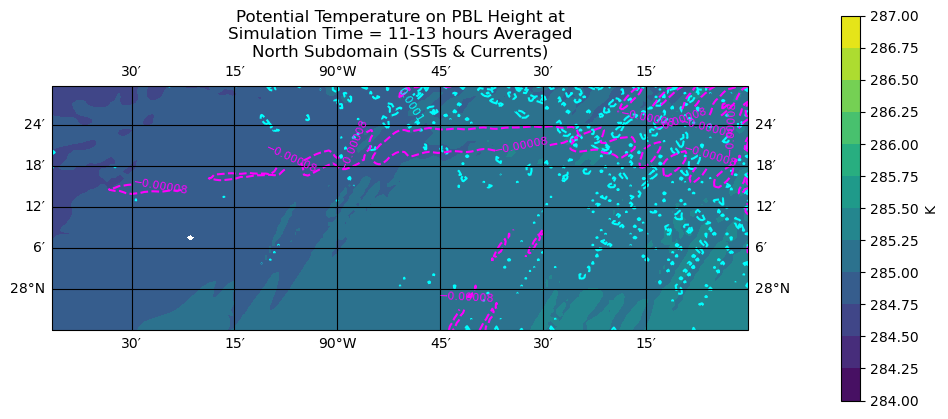

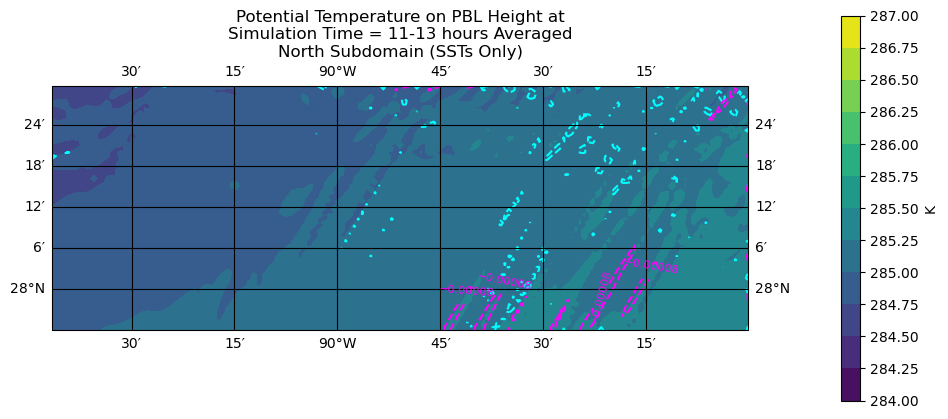

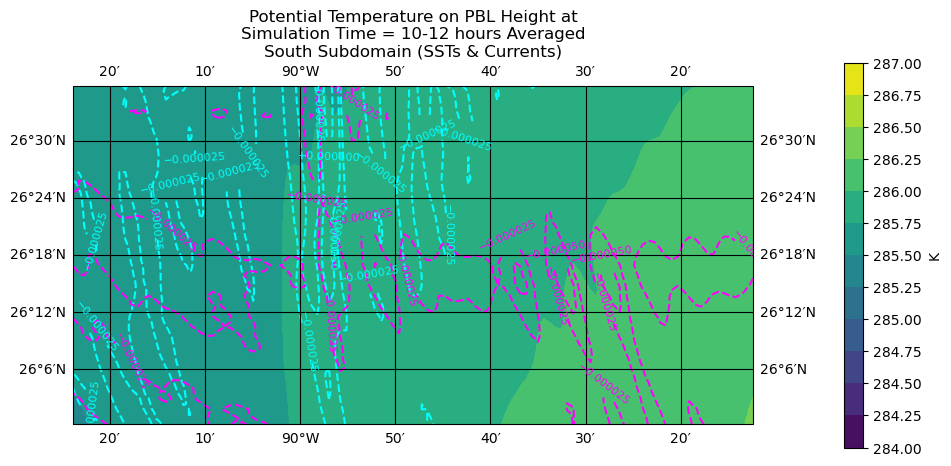

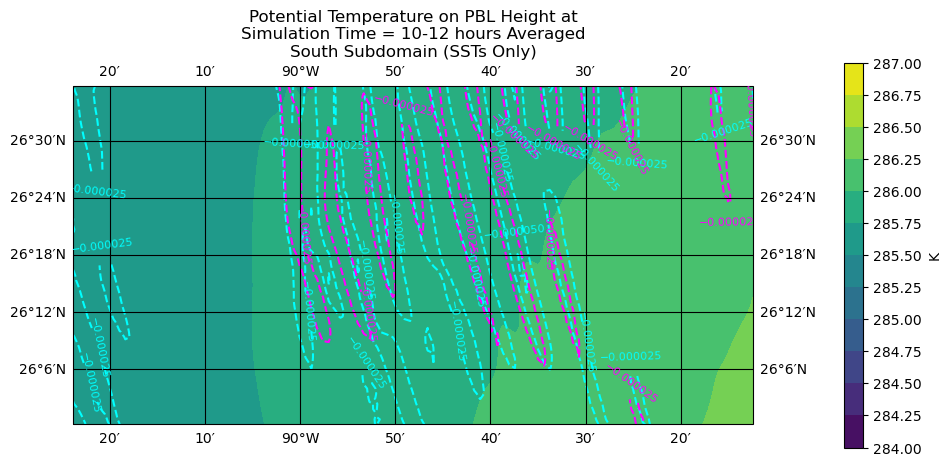

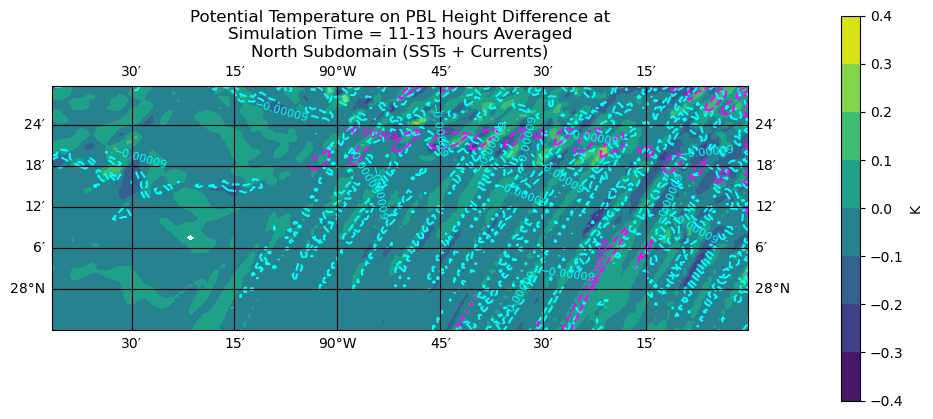

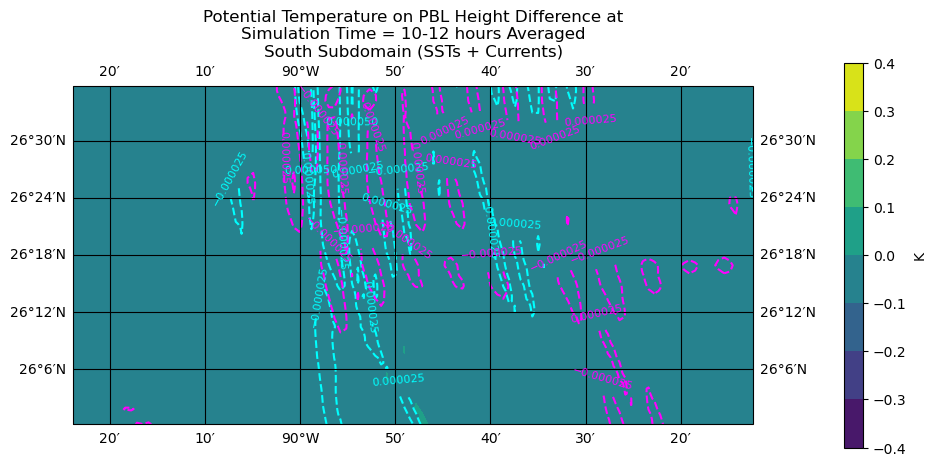

In [16]:
vort_bounds_pblh_N = [ 0.0001, 0.0003, 0.0006]
vort_bounds_sfc_N = [-0.00016, -0.00008]

vort_bounds_pblh_S = [-0.0002, -0.0001, -0.00005, -0.000025]
vort_bounds_sfc_S = [-0.001, -0.00005, -0.000025]

vort_bounds_diff_S = [-0.003, -0.001 -0.00005, -0.000025, 0.000025, 0.00005, 0.001, 0.003]
vort_bounds_diff_N = [ -0.001, -0.00009, 0.0009, 0.001]

#AVG
sst_north_avg_theta = np.mean( np.array([sst_theta11_pblh_north ,sst_theta12_pblh_north, sst_theta13_pblh_north]), axis=0 )
sst_south_avg_theta = np.mean( np.array([sst_theta10_pblh_south ,sst_theta11_pblh_south, sst_theta12_pblh_south]), axis=0 )
cur_north_avg_theta = np.mean( np.array([cur_theta11_pblh_north ,cur_theta12_pblh_north, cur_theta13_pblh_north]), axis=0 )
cur_south_avg_theta = np.mean( np.array([cur_theta10_pblh_south ,cur_theta11_pblh_south, cur_theta12_pblh_south]), axis=0 )

N_diff = cur_north_avg_theta - sst_north_avg_theta
S_diff = cur_south_avg_theta - sst_south_avg_theta 

#PLOT w at PBLH 
bounds = [284, 284.25, 284.5, 284.75, 285, 285.25, 285.5, 285.75, 286, 286.25, 286.5, 286.75, 287]

#CUR NORTH
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, cur_curl_N_pblh, levels= vort_bounds_pblh_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, cur_curl10_N, levels = vort_bounds_sfc_N, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, cur_north_avg_theta, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs & Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@pblh_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#SST NORTH
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, sst_curl_N_pblh, levels = vort_bounds_pblh_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, sst_curl10_N, levels = vort_bounds_sfc_N , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, sst_north_avg_theta, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@pblh_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#SST CUR
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, cur_curl_S_pblh, levels = vort_bounds_pblh_S , linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, cur_curl10_S, levels = vort_bounds_sfc_S , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, cur_south_avg_theta, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs & Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'souht_theta@pblh_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#SST SOUTH
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, sst_curl_S_pblh, levels = vort_bounds_pblh_S , linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, sst_curl10_S, levels = vort_bounds_sfc_S , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, sst_south_avg_theta, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_theta@pblh_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

bounds = [-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4] 
#N diff
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, N_pblh_diff, levels = vort_bounds_diff_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, N_sfc_diff, levels = vort_bounds_diff_N, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, N_diff, levels = bounds)
#cs = ax.contourf(north_lon, north_lat, N_diff)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1,  label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height Difference at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@pblh_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#S diff 
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, S_pblh_diff, levels = vort_bounds_diff_S, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, S_sfc_diff, levels = vort_bounds_diff_S, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, S_diff, levels = bounds)
#cs = ax.contourf(south_lon, south_lat, S_diff)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature on PBL Height Difference at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_theta@pblh_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [11]:
#get w at PBLH+500
sst_theta10_free = interplevel(sst_theta10, sst_height_agl10, sst_pblh_10 + 500)
sst_theta11_free = interplevel(sst_theta11, sst_height_agl11, sst_pblh_11 + 500)
sst_theta12_free = interplevel(sst_theta12, sst_height_agl12, sst_pblh_12 + 500)
sst_theta13_free = interplevel(sst_theta13, sst_height_agl13, sst_pblh_13 + 500)

cur_theta10_free = interplevel(cur_theta10, cur_height_agl10, cur_pblh_10 + 500)
cur_theta11_free = interplevel(cur_theta10, cur_height_agl11, cur_pblh_11 + 500)
cur_theta12_free = interplevel(cur_theta10, cur_height_agl12, cur_pblh_12 + 500)
cur_theta13_free = interplevel(cur_theta10, cur_height_agl13, cur_pblh_13 + 500)

sst_theta10_free = interplevel(sst_theta10, sst_height_agl10, sst_pblh_10 + 500)
sst_theta11_free = interplevel(sst_theta11, sst_height_agl11, sst_pblh_11 + 500)
sst_theta12_free = interplevel(sst_theta12, sst_height_agl12, sst_pblh_12 + 500)
sst_theta13_free = interplevel(sst_theta13, sst_height_agl13, sst_pblh_13 + 500)

cur_theta10_free = interplevel(cur_theta10, cur_height_agl10, cur_pblh_10 +500)
cur_theta11_free = interplevel(cur_theta11, cur_height_agl11, cur_pblh_11 +500)
cur_theta12_free = interplevel(cur_theta12, cur_height_agl12, cur_pblh_12 +500)
cur_theta13_free = interplevel(cur_theta13, cur_height_agl13, cur_pblh_13 +500)
print(cur_theta10_free.shape)


(474, 639)


In [43]:
#print(sst_height_agl10)

In [12]:
#CUR
cur_theta10_free_south= []
for y in lat_int_south:
    inner_arr_cur10 = []
    for x in lon_int_south:
        inner_arr_cur10.append(cur_theta10_free[y][x])
    cur_theta10_free_south.append(inner_arr_cur10)
cur_theta10_free_south = np.array(cur_theta10_free_south)

cur_theta10_free_north = []
for y in lat_int_north:
    inner_arr_cur10 = []
    for x in lon_int_north:
        inner_arr_cur10.append(cur_theta10_free[y][x])
    cur_theta10_free_north.append(inner_arr_cur10)
cur_theta10_free_north = np.array(cur_theta10_free_north)

cur_theta11_free_south= []
for y in lat_int_south:
    inner_arr_cur11 = []
    for x in lon_int_south:
        inner_arr_cur11.append(cur_theta11_free[y][x])
    cur_theta11_free_south.append(inner_arr_cur11)
cur_theta11_free_south = np.array(cur_theta11_free_south)

cur_theta11_free_north = []
for y in lat_int_north:
    inner_arr_cur11 = []
    for x in lon_int_north:
        inner_arr_cur11.append(cur_theta11_free[y][x])
    cur_theta11_free_north.append(inner_arr_cur11)
cur_theta11_free_north = np.array(cur_theta11_free_north)

cur_theta12_free_south= []
for y in lat_int_south:
    inner_arr_cur12 = []
    for x in lon_int_south:
        inner_arr_cur12.append(cur_theta12_free[y][x])
    cur_theta12_free_south.append(inner_arr_cur12)
cur_theta12_free_south = np.array(cur_theta12_free_south)

cur_theta12_free_north = []
for y in lat_int_north:
    inner_arr_cur12 = []
    for x in lon_int_north:
        inner_arr_cur12.append(cur_theta12_free[y][x])
    cur_theta12_free_north.append(inner_arr_cur12)
cur_theta12_free_north = np.array(cur_theta12_free_north)

cur_theta13_free_south= []
for y in lat_int_south:
    inner_arr_cur13 = []
    for x in lon_int_south:
        inner_arr_cur13.append(cur_theta13_free[y][x])
    cur_theta13_free_south.append(inner_arr_cur13)
cur_theta13_free_south = np.array(cur_theta13_free_south)

cur_theta13_free_north = []
for y in lat_int_north:
    inner_arr_cur13 = []
    for x in lon_int_north:
        inner_arr_cur13.append(cur_theta13_free[y][x])
    cur_theta13_free_north.append(inner_arr_cur13)
cur_theta13_free_north = np.array(cur_theta13_free_north)
print(cur_theta13_free_north.shape)

#SST
sst_theta10_free_south= []
for y in lat_int_south:
    inner_arr_sst10 = []
    for x in lon_int_south:
        inner_arr_sst10.append(sst_theta10_free[y][x])
    sst_theta10_free_south.append(inner_arr_sst10)
sst_theta10_free_south = np.array(sst_theta10_free_south)

sst_theta10_free_north = []
for y in lat_int_north:
    inner_arr_sst10 = []
    for x in lon_int_north:
        inner_arr_sst10.append(sst_theta10_free[y][x])
    sst_theta10_free_north.append(inner_arr_sst10)
sst_theta10_free_north = np.array(sst_theta10_free_north)

sst_theta11_free_south= []
for y in lat_int_south:
    inner_arr_sst11 = []
    for x in lon_int_south:
        inner_arr_sst11.append(sst_theta11_free[y][x])
    sst_theta11_free_south.append(inner_arr_sst11)
sst_theta11_free_south = np.array(sst_theta11_free_south)

sst_theta11_free_north = []
for y in lat_int_north:
    inner_arr_sst11 = []
    for x in lon_int_north:
        inner_arr_sst11.append(sst_theta11_free[y][x])
    sst_theta11_free_north.append(inner_arr_sst11)
sst_theta11_free_north = np.array(sst_theta11_free_north)

sst_theta12_free_south= []
for y in lat_int_south:
    inner_arr_sst12 = []
    for x in lon_int_south:
        inner_arr_sst12.append(sst_theta12_free[y][x])
    sst_theta12_free_south.append(inner_arr_sst12)
sst_theta12_free_south = np.array(sst_theta12_free_south)

sst_theta12_free_north = []
for y in lat_int_north:
    inner_arr_sst12 = []
    for x in lon_int_north:
        inner_arr_sst12.append(sst_theta12_free[y][x])
    sst_theta12_free_north.append(inner_arr_sst12)
sst_theta12_free_north = np.array(sst_theta12_free_north)

sst_theta13_free_south= []
for y in lat_int_south:
    inner_arr_sst13 = []
    for x in lon_int_south:
        inner_arr_sst13.append(sst_theta13_free[y][x])
    sst_theta13_free_south.append(inner_arr_sst13)
sst_theta13_free_south = np.array(sst_theta13_free_south)

sst_theta13_free_north = []
for y in lat_int_north:
    inner_arr_sst13 = []
    for x in lon_int_north:
        inner_arr_sst13.append(sst_theta13_free[y][x])
    sst_theta13_free_north.append(inner_arr_sst13)
sst_theta13_free_north = np.array(sst_theta13_free_north)
print(sst_theta13_free_north.shape)

(67, 167)
(67, 167)


In [13]:
#AVG
sst_north_avg_theta_free = np.mean( np.array([sst_theta11_free_north ,sst_theta12_free_north, sst_theta13_free_north]), axis=0 )
sst_south_avg_theta_free = np.mean( np.array([sst_theta10_free_south ,sst_theta11_free_south, sst_theta12_free_south]), axis=0 )
cur_north_avg_theta_free = np.mean( np.array([cur_theta11_free_north ,cur_theta12_free_north, cur_theta13_free_north]), axis=0 )
cur_south_avg_theta_free = np.mean( np.array([cur_theta10_free_south ,cur_theta11_free_south, cur_theta12_free_south]), axis=0 )

N_diff = cur_north_avg_theta_free - sst_north_avg_theta_free
S_diff = cur_south_avg_theta_free - sst_south_avg_theta_free


print('N SST')
print(np.nanmax(sst_north_avg_theta_free))
print(np.nanmin(sst_north_avg_theta_free))
print('N CUR')
print(np.nanmax(cur_north_avg_theta_free))
print(np.nanmin(cur_north_avg_theta_free))
print('S SST')
print(np.max(sst_south_avg_theta_free))
print(np.min(sst_south_avg_theta_free))
print('S CUR')
print(np.max(cur_south_avg_theta_free))
print(np.min(cur_south_avg_theta_free))
print('N diff')
print(np.nanmax(N_diff))
print(np.nanmin(N_diff))
print('S diff')
print(np.max(S_diff))
print(np.min(S_diff))

N SST
291.9917
288.67984
N CUR
291.93527
289.12454
S SST
292.99905
292.5104
S CUR
292.994
292.48828
N diff
1.5220337
-2.0636902
S diff
0.019134521
-0.23852539


In [15]:
sst_north_theta_mean_free =np.nanmean(sst_north_avg_theta_free)
sst_south_theta_mean_free =np.nanmean(sst_south_avg_theta_free)
cur_north_theta_mean_free =np.nanmean(cur_north_avg_theta_free)
cur_south_theta_mean_free =np.nanmean(cur_south_avg_theta_free) 
print('sst_north_theta_mean: ', sst_north_theta_mean_free)
print('sst_south_theta_mean: ', sst_south_theta_mean_free)
print('cur_north_theta_mean: ', cur_north_theta_mean_free)
print('cur_south_theta_mean: ', cur_south_theta_mean_free)

sst_north_theta_std_free =np.nanstd(sst_north_avg_theta_free)
sst_south_theta_std_free =np.nanstd(sst_south_avg_theta_free)
cur_north_theta_std_free =np.nanstd(cur_north_avg_theta_free)
cur_south_theta_std_free =np.nanstd(cur_south_avg_theta_free)
print( '  ' )
print('sst_north_theta_std: ', sst_north_theta_std_free)
print('sst_south_theta_std: ', sst_south_theta_std_free)
print('cur_north_theta_std: ', cur_north_theta_std_free)
print('cur_south_theta_std: ', cur_south_theta_std_free)

N_diff_mean_free = cur_north_theta_mean_free - sst_north_theta_mean_free 
S_diff_mean_free = cur_south_theta_mean_free - sst_south_theta_mean_free
print( '  ' )
print('N_diff_mean: ', N_diff_mean_free)
print('S_diff_mean: ', S_diff_mean_free)

N_diff_std_free = cur_north_theta_std_free - sst_north_theta_std_free 
S_diff_std_free = cur_south_theta_std_free - sst_south_theta_std_free
print( '  ' )
print('N_diff_std: ', N_diff_std_free)
print('S_diff_std: ', S_diff_std_free)

sst_north_theta_mean_uncer_free = sst_north_theta_std_free /np.sqrt(n_N)
sst_south_theta_mean_uncer_free = sst_south_theta_std_free /np.sqrt(n_S)
cur_north_theta_mean_uncer_free = cur_north_theta_std_free /np.sqrt(n_N)
cur_south_theta_mean_uncer_free = cur_south_theta_std_free /np.sqrt(n_S)
print( '  ' )
print('sst_north_theta_mean_uncer: ', sst_north_theta_mean_uncer_free)
print('sst_south_theta_mean_uncer: ', sst_south_theta_mean_uncer_free)
print('cur_north_theta_mean_uncer: ', cur_north_theta_mean_uncer_free)
print('cur_south_theta_mean_uncer: ', cur_south_theta_mean_uncer_free)

n_diff_mean_uncer_free =np.sqrt( ((cur_north_theta_std_free**2)/n_N) + ((sst_north_theta_std_free**2)/n_N))
s_diff_mean_uncer_free = np.sqrt( ((cur_south_theta_std_free**2)/n_S) + ((sst_south_theta_std_free**2)/n_S))
print( '  ' )
print('n_diff_mean_uncer: ', n_diff_mean_uncer_free)
print('s_diff_mean_uncer: ', s_diff_mean_uncer_free)

sst_north_theta_mean:  291.13123
sst_south_theta_mean:  292.81396
cur_north_theta_mean:  291.0302
cur_south_theta_mean:  292.78543
  
sst_north_theta_std:  0.31154722
sst_south_theta_std:  0.16302843
cur_north_theta_std:  0.3460329
cur_south_theta_std:  0.16637637
  
N_diff_mean:  -0.10101318
S_diff_mean:  -0.028533936
  
N_diff_std:  0.034485668
S_diff_std:  0.0033479333
  
sst_north_theta_mean_uncer:  0.0029452912219609297
sst_south_theta_mean_uncer:  0.0018335170449491876
cur_north_theta_mean_uncer:  0.003271310292711196
cur_south_theta_mean_uncer:  0.0018711699414985072
  
n_diff_mean_uncer:  0.004401841820574464
s_diff_mean_uncer:  0.0026197445875670265


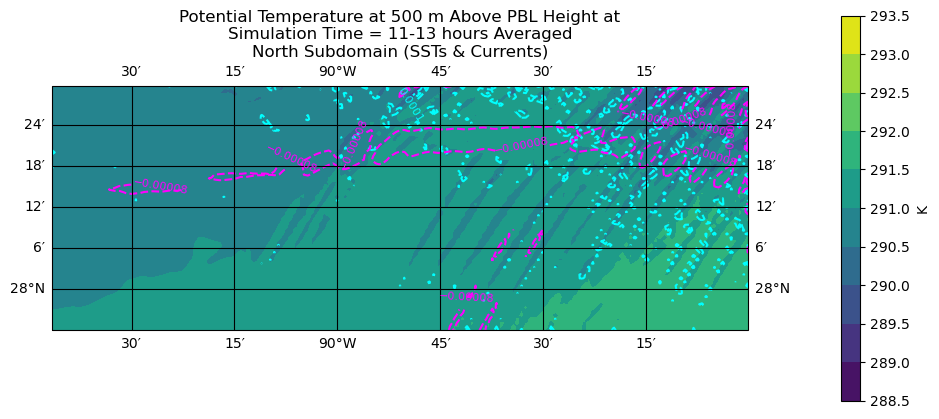

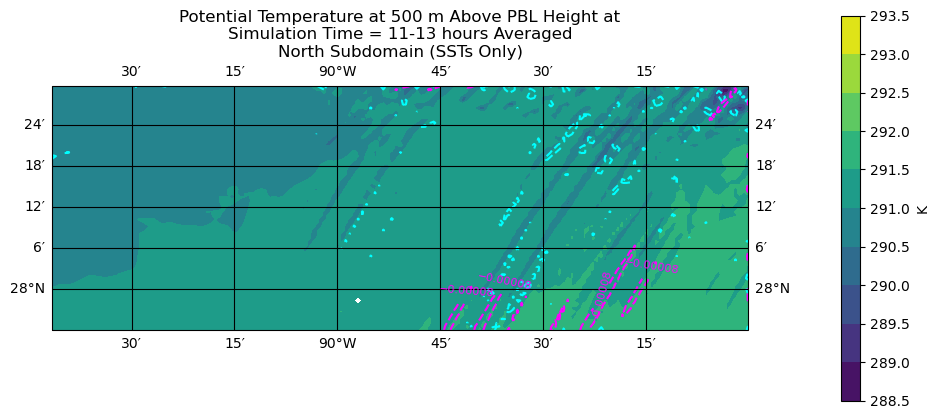

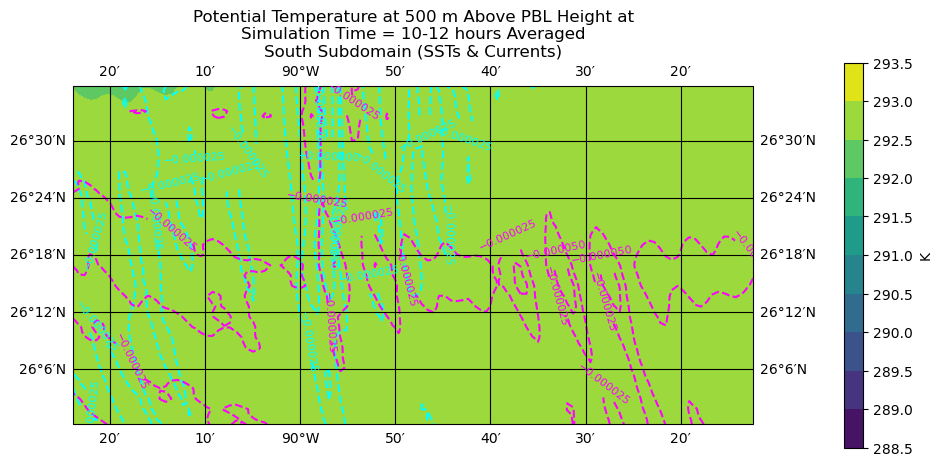

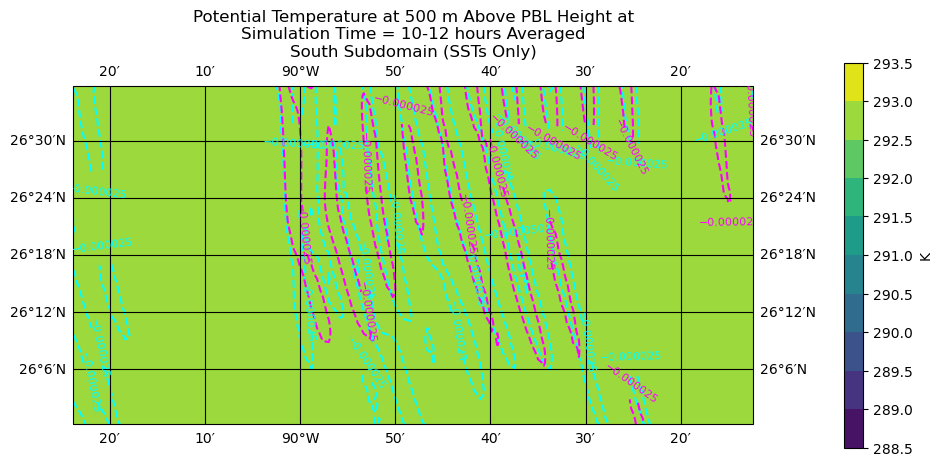

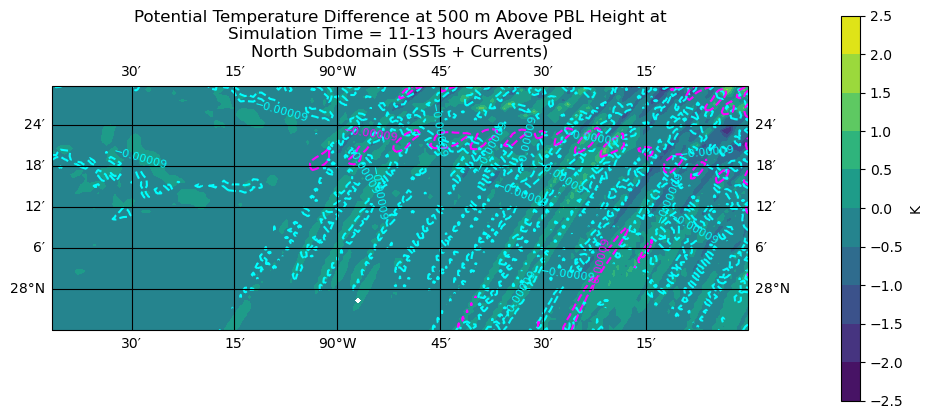

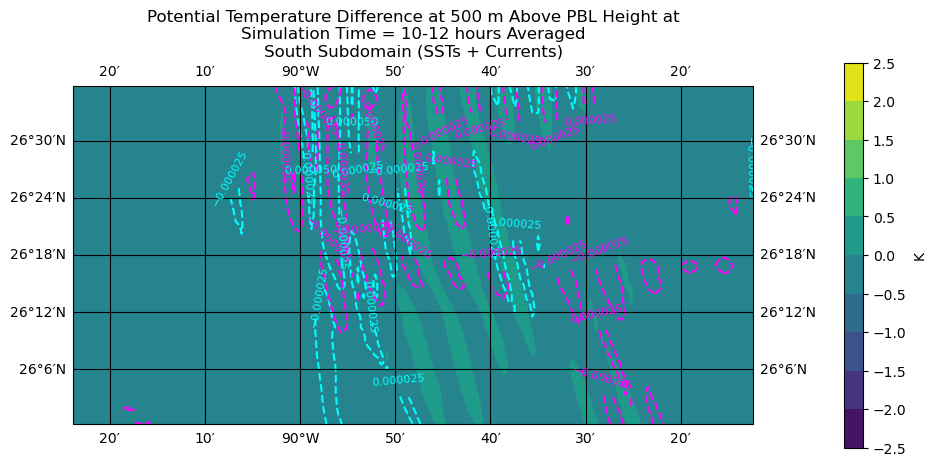

In [21]:


vort_bounds_pblh_N = [ 0.0001, 0.0003, 0.0006]
vort_bounds_sfc_N = [-0.00016, -0.00008]

vort_bounds_pblh_S = [-0.0002, -0.0001, -0.00005, -0.000025]
vort_bounds_sfc_S = [-0.001, -0.00005, -0.000025]

vort_bounds_diff_S = [-0.003, -0.001 -0.00005, -0.000025, 0.000025, 0.00005, 0.001, 0.003]
vort_bounds_diff_N = [ -0.001, -0.00009, 0.0009, 0.001]



#PLOT w at PBLH +500
bounds = [288.5, 289, 289.5, 290, 290.5, 291, 291.5, 292, 292.5, 293, 293.5]
#NORTH CUR
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, cur_curl_N_pblh, levels= vort_bounds_pblh_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, cur_curl10_N, levels = vort_bounds_sfc_N, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, cur_north_avg_theta_free, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature at 500 m Above PBL Height at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs & Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@free_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#NORTH SST
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, sst_curl_N_pblh, levels = vort_bounds_pblh_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, sst_curl10_N, levels = vort_bounds_sfc_N , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, sst_north_avg_theta_free, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature at 500 m Above PBL Height at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@free_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#SOUTH CUR 
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, cur_curl_S_pblh, levels = vort_bounds_pblh_S , linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, cur_curl10_S, levels = vort_bounds_sfc_S , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, cur_south_avg_theta_free, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature at 500 m Above PBL Height at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs & Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_theta@free_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#South SST
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, sst_curl_S_pblh, levels = vort_bounds_pblh_S , linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, sst_curl10_S, levels = vort_bounds_sfc_S , linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, sst_south_avg_theta_free, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature at 500 m Above PBL Height at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_theta@free_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()


bounds = [-2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5] 
#N diff
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(north_lon, north_lat, N_pblh_diff, levels = vort_bounds_diff_N, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(north_lon, north_lat, N_sfc_diff, levels = vort_bounds_diff_N, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, N_diff, levels = bounds)
#cs = ax.contourf(north_lon, north_lat, N_diff)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1,  label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature Difference at 500 m Above PBL Height at\nSimulation Time = 11-13 hours Averaged\nNorth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_theta@free_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#S diff 
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#PBLH VORT
cs1 = ax.contour(south_lon, south_lat, S_pblh_diff, levels = vort_bounds_diff_S, linestyles = "dashed", colors = 'cyan')
ax.clabel(cs1, inline=True, fontsize=8)
#SFC VORT
cs2 = ax.contour(south_lon, south_lat, S_sfc_diff, levels = vort_bounds_diff_S, linestyles = "dashed", colors = 'magenta')
ax.clabel(cs2, inline=True, fontsize=8)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, S_diff, levels = bounds)
#cs = ax.contourf(south_lon, south_lat, S_diff)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, ticks = bounds, label = 'K')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad =0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Potential Temperature Difference at 500 m Above PBL Height at\nSimulation Time = 10-12 hours Averaged\nSouth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_theta@free_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [20]:

sst_theta_north = (sst_theta11 + sst_theta12 + sst_theta13) /3
sst_theta_south = (sst_theta10 + sst_theta11 + sst_theta12) /3
cur_theta_north = (cur_theta11 + cur_theta12 + cur_theta13) /3
cur_theta_south = (cur_theta10 + cur_theta11 + cur_theta12) /3

cur_z10 = getvar(cur_wrfout10, "z")
cur_z11 = getvar(cur_wrfout11, "z")
cur_z12 = getvar(cur_wrfout12, "z")
cur_z13 = getvar(cur_wrfout13, "z")

sst_z10 = getvar(sst_wrfout10, "z")
sst_z11 = getvar(sst_wrfout11, "z")
sst_z12 = getvar(sst_wrfout12, "z")
sst_z13 = getvar(sst_wrfout13, "z")

z_sst_south = (sst_z10 + sst_z11 +sst_z12)/3
z_cur_south = (cur_z10 + cur_z11 +cur_z12)/3
z_sst_north = (sst_z11 + sst_z12 +sst_z13)/3
z_cur_north = (cur_z11 + sst_z12 +sst_z13)/3

N_diff = cur_theta_north -sst_theta_north 
S_diff = cur_theta_south -sst_theta_south 

N_cur_pblh = (cur_pblh_11 + cur_pblh_12 +cur_pblh_13) /3
N_sst_pblh = (sst_pblh_11 + sst_pblh_12 +sst_pblh_13) /3
S_cur_pblh = (cur_pblh_10 + cur_pblh_11 +cur_pblh_12) /3
S_sst_pblh = (sst_pblh_10 + sst_pblh_11 +sst_pblh_12) /3

N_pblh_diff = N_cur_pblh - N_sst_pblh
S_pblh_diff = S_cur_pblh - S_sst_pblh

print(np.max(N_diff))
print(np.max(S_diff))
print(np.min(N_diff))
print(np.min(S_diff))

<xarray.DataArray ()>
array(1.33230591)
Coordinates:
    XTIME    float32 420.0
    Time     datetime64[ns] 2018-03-25T13:00:00
<xarray.DataArray ()>
array(1.38034058)
Coordinates:
    XTIME    float32 360.0
    Time     datetime64[ns] 2018-03-25T12:00:00
<xarray.DataArray ()>
array(-1.37866211)
Coordinates:
    XTIME    float32 420.0
    Time     datetime64[ns] 2018-03-25T13:00:00
<xarray.DataArray ()>
array(-1.43588257)
Coordinates:
    XTIME    float32 360.0
    Time     datetime64[ns] 2018-03-25T12:00:00


In [8]:
#Get PBLH line

#cur_pblh_12
#wrf.interpline(field2d, wrfin=None, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=None, end_point=None, latlon=False, cache=None, meta=True)
#pblh_line = wrf.interpline(field2d = cur_pblh_12, wrfin=cur_wrfout12, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=CoordPair(lat=28.5, lon=-89.9), end_point=CoordPair(lat=27.9, lon=-89.9), latlon=True, cache=None, meta=True)

N_pblh_line_sst = wrf.interpline(field2d = N_sst_pblh, wrfin=cur_wrfout12, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=CoordPair(lat=28.5, lon=-89.1), end_point=CoordPair(lat=27.7, lon=-89.1), latlon=True, cache=None, meta=True)
S_pblh_line_sst = wrf.interpline(field2d = S_sst_pblh, wrfin=cur_wrfout12, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=CoordPair(lat=26.6, lon=-89.9), end_point=CoordPair(lat=26.0, lon=-89.9), latlon=True, cache=None, meta=True)
N_pblh_line_cur = wrf.interpline(field2d = N_cur_pblh, wrfin=cur_wrfout12, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=CoordPair(lat=28.5, lon=-89.1), end_point=CoordPair(lat=27.7, lon=-89.1), latlon=True, cache=None, meta=True)
S_pblh_line_cur = wrf.interpline(field2d = S_cur_pblh, wrfin=cur_wrfout12, timeidx=0, stagger=None, projection=None, ll_point=None, pivot_point=None, angle=None, start_point=CoordPair(lat=26.6, lon=-89.9), end_point=CoordPair(lat=26.0, lon=-89.9), latlon=True, cache=None, meta=True)

print(N_pblh_line_sst.shape)
print(S_pblh_line_sst.shape)
print(N_pblh_line_cur.shape)
print(S_pblh_line_cur.shape)


(90,)
(68,)
(90,)
(68,)


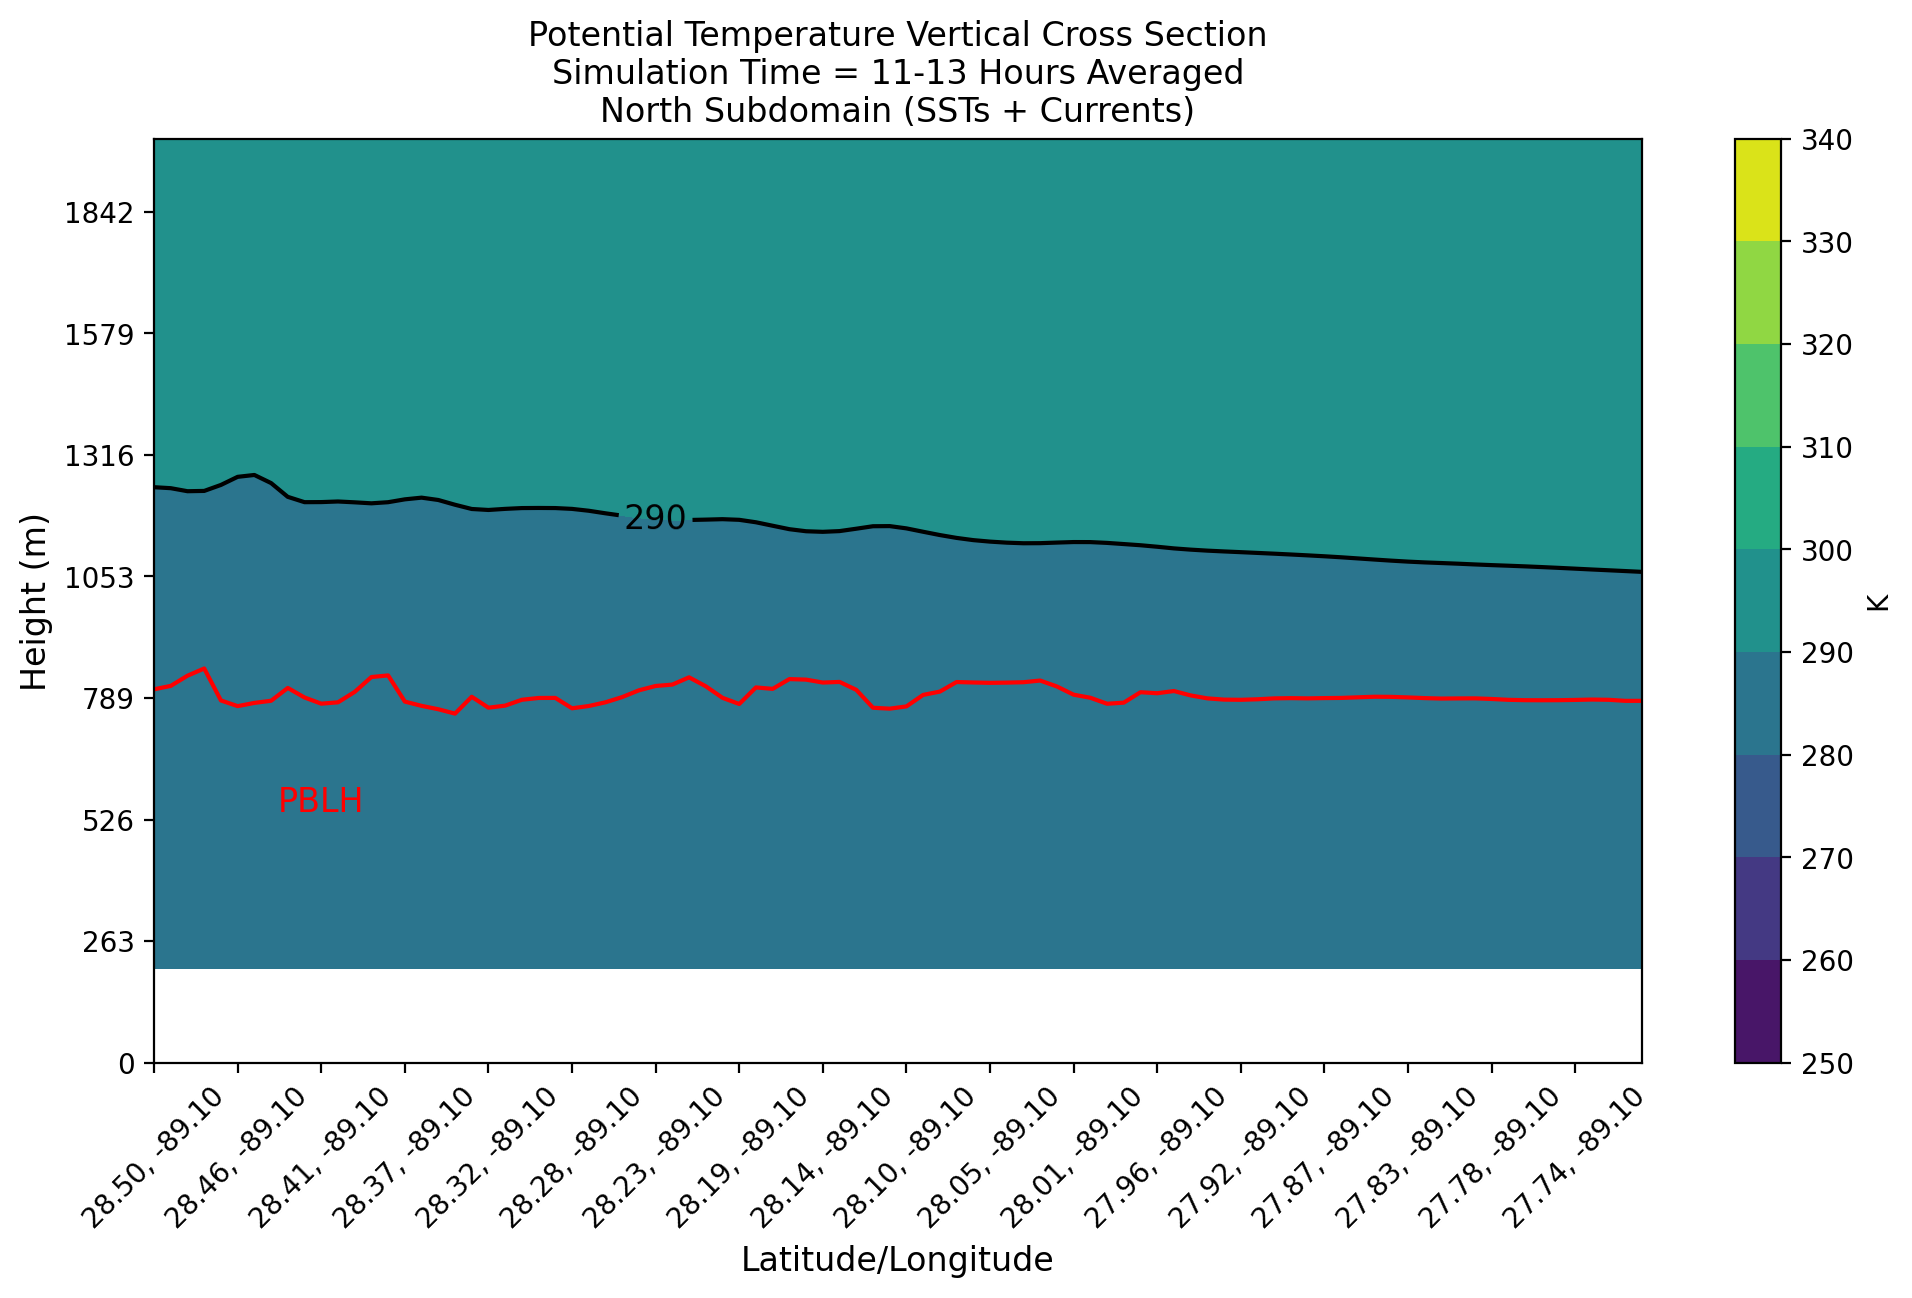

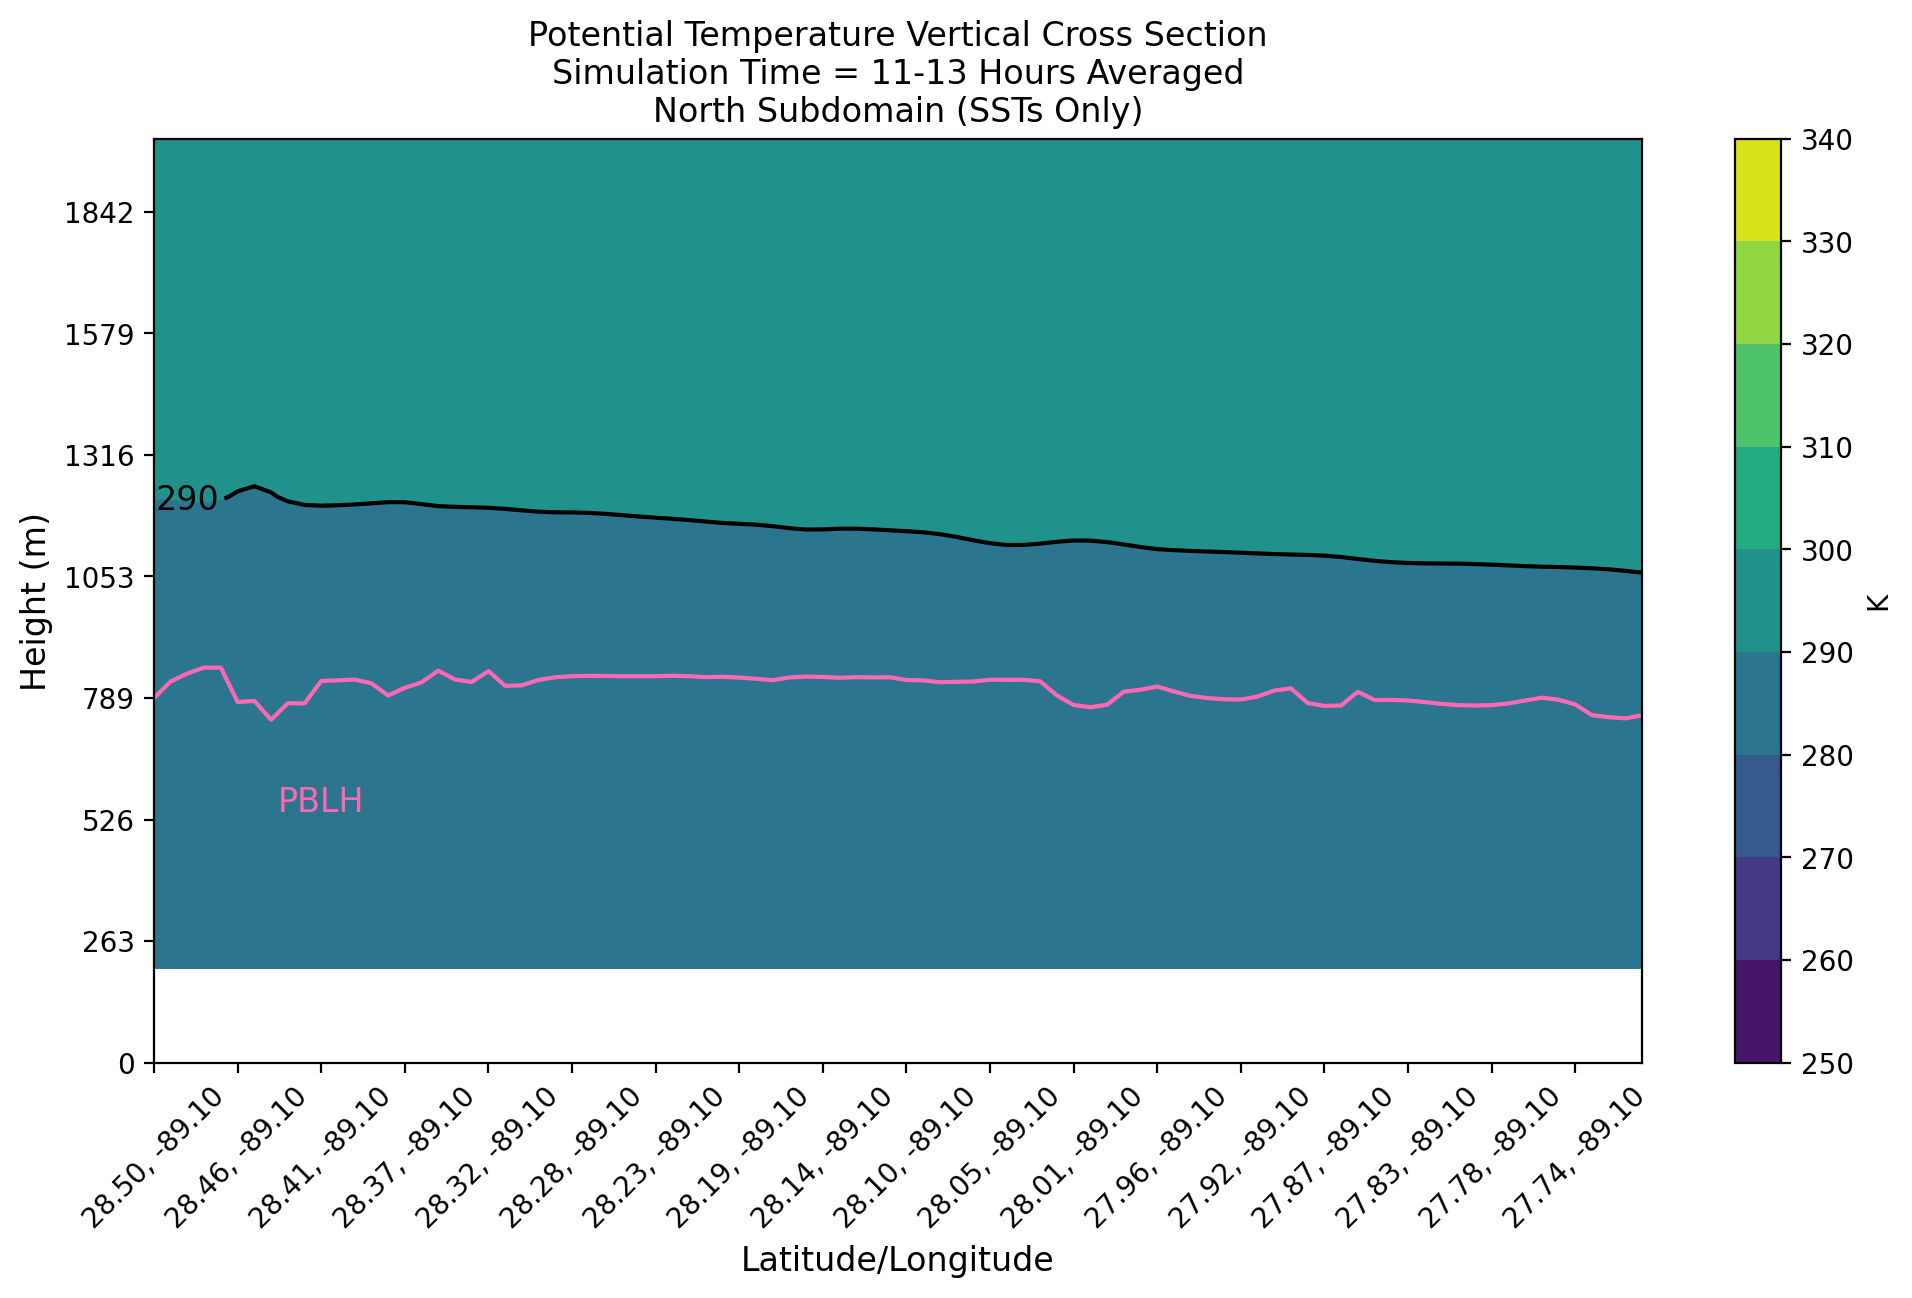

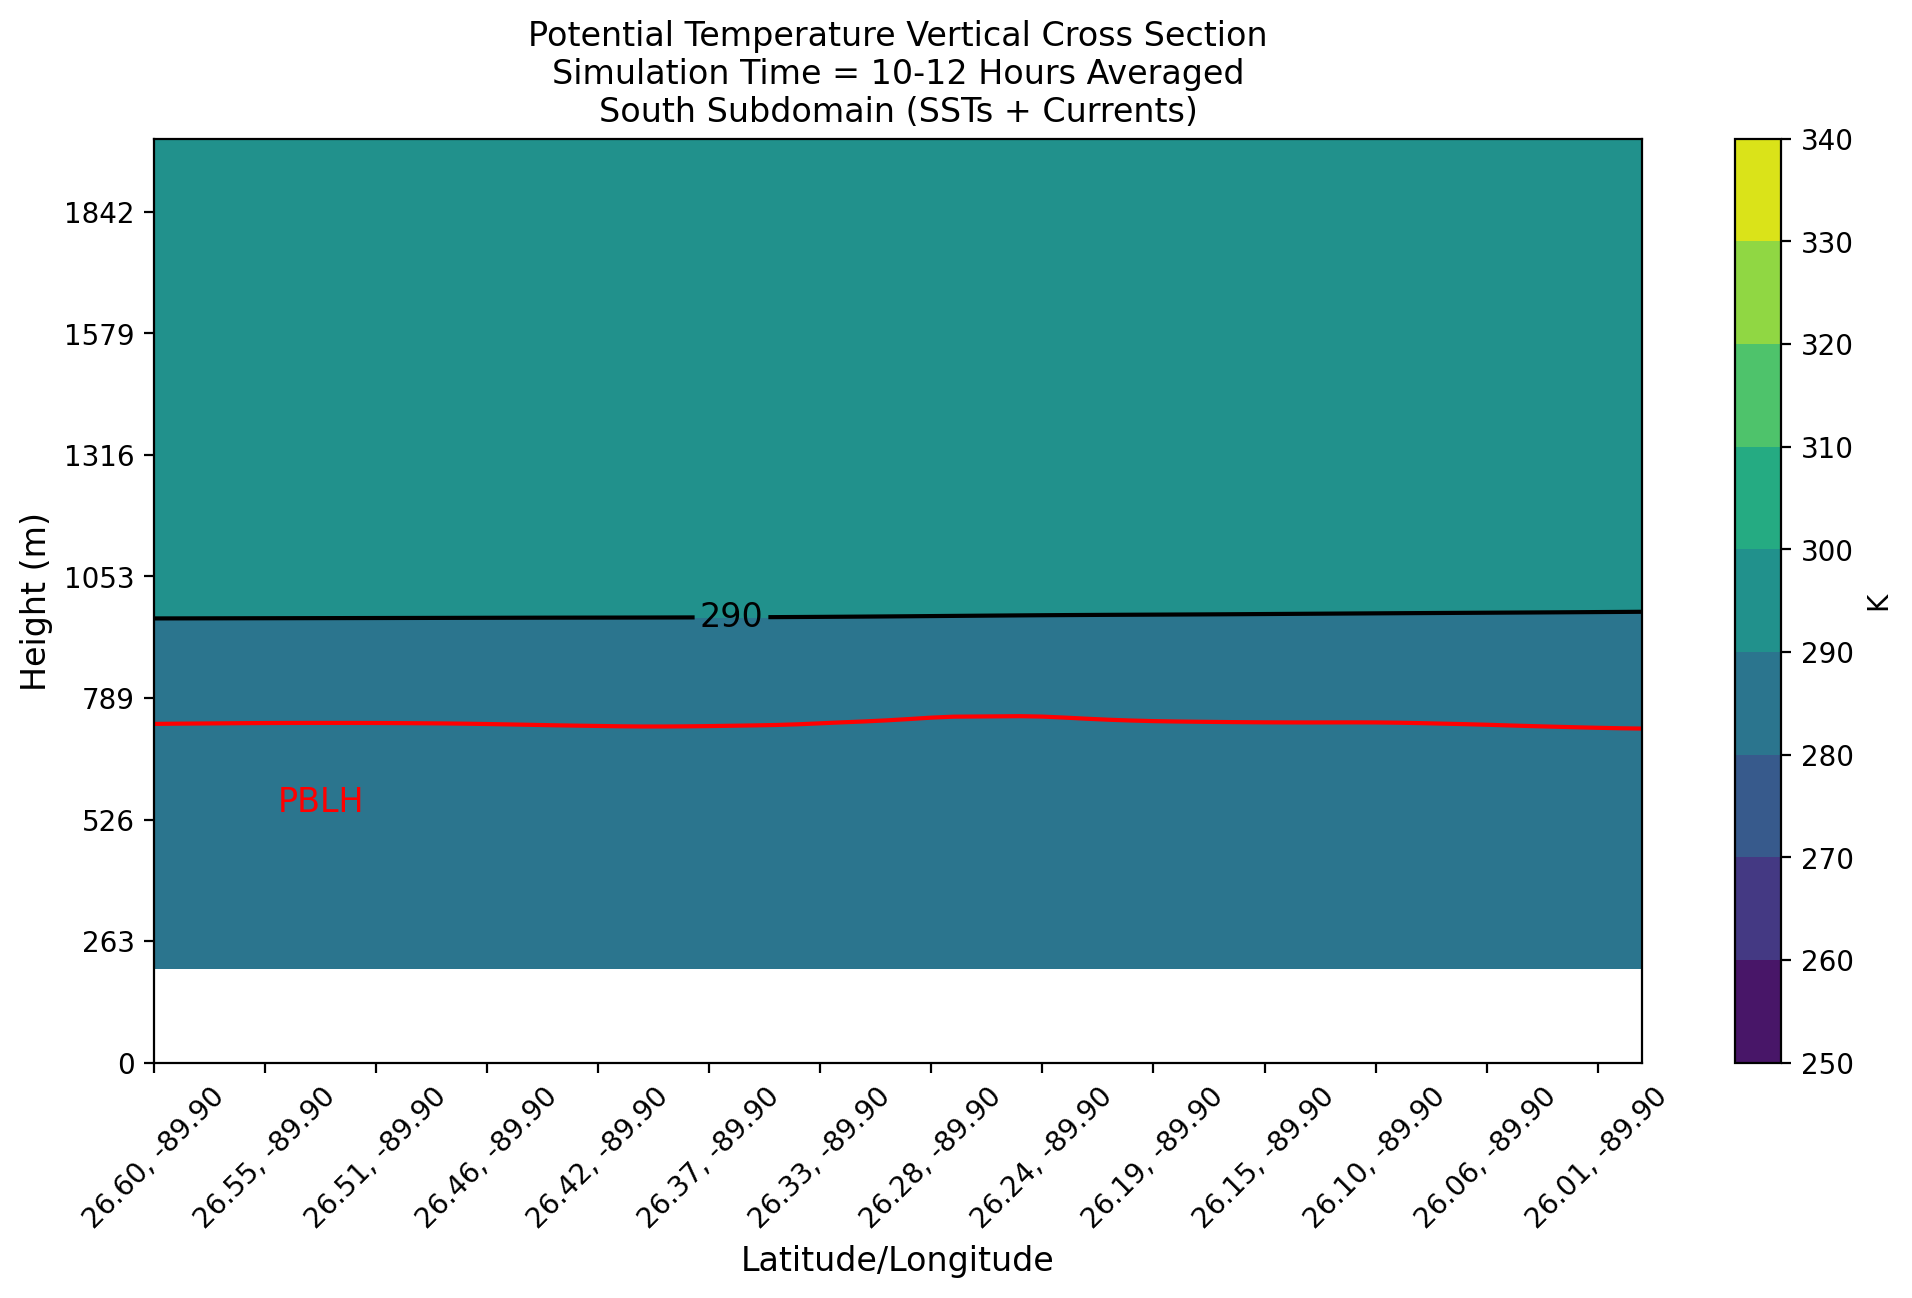

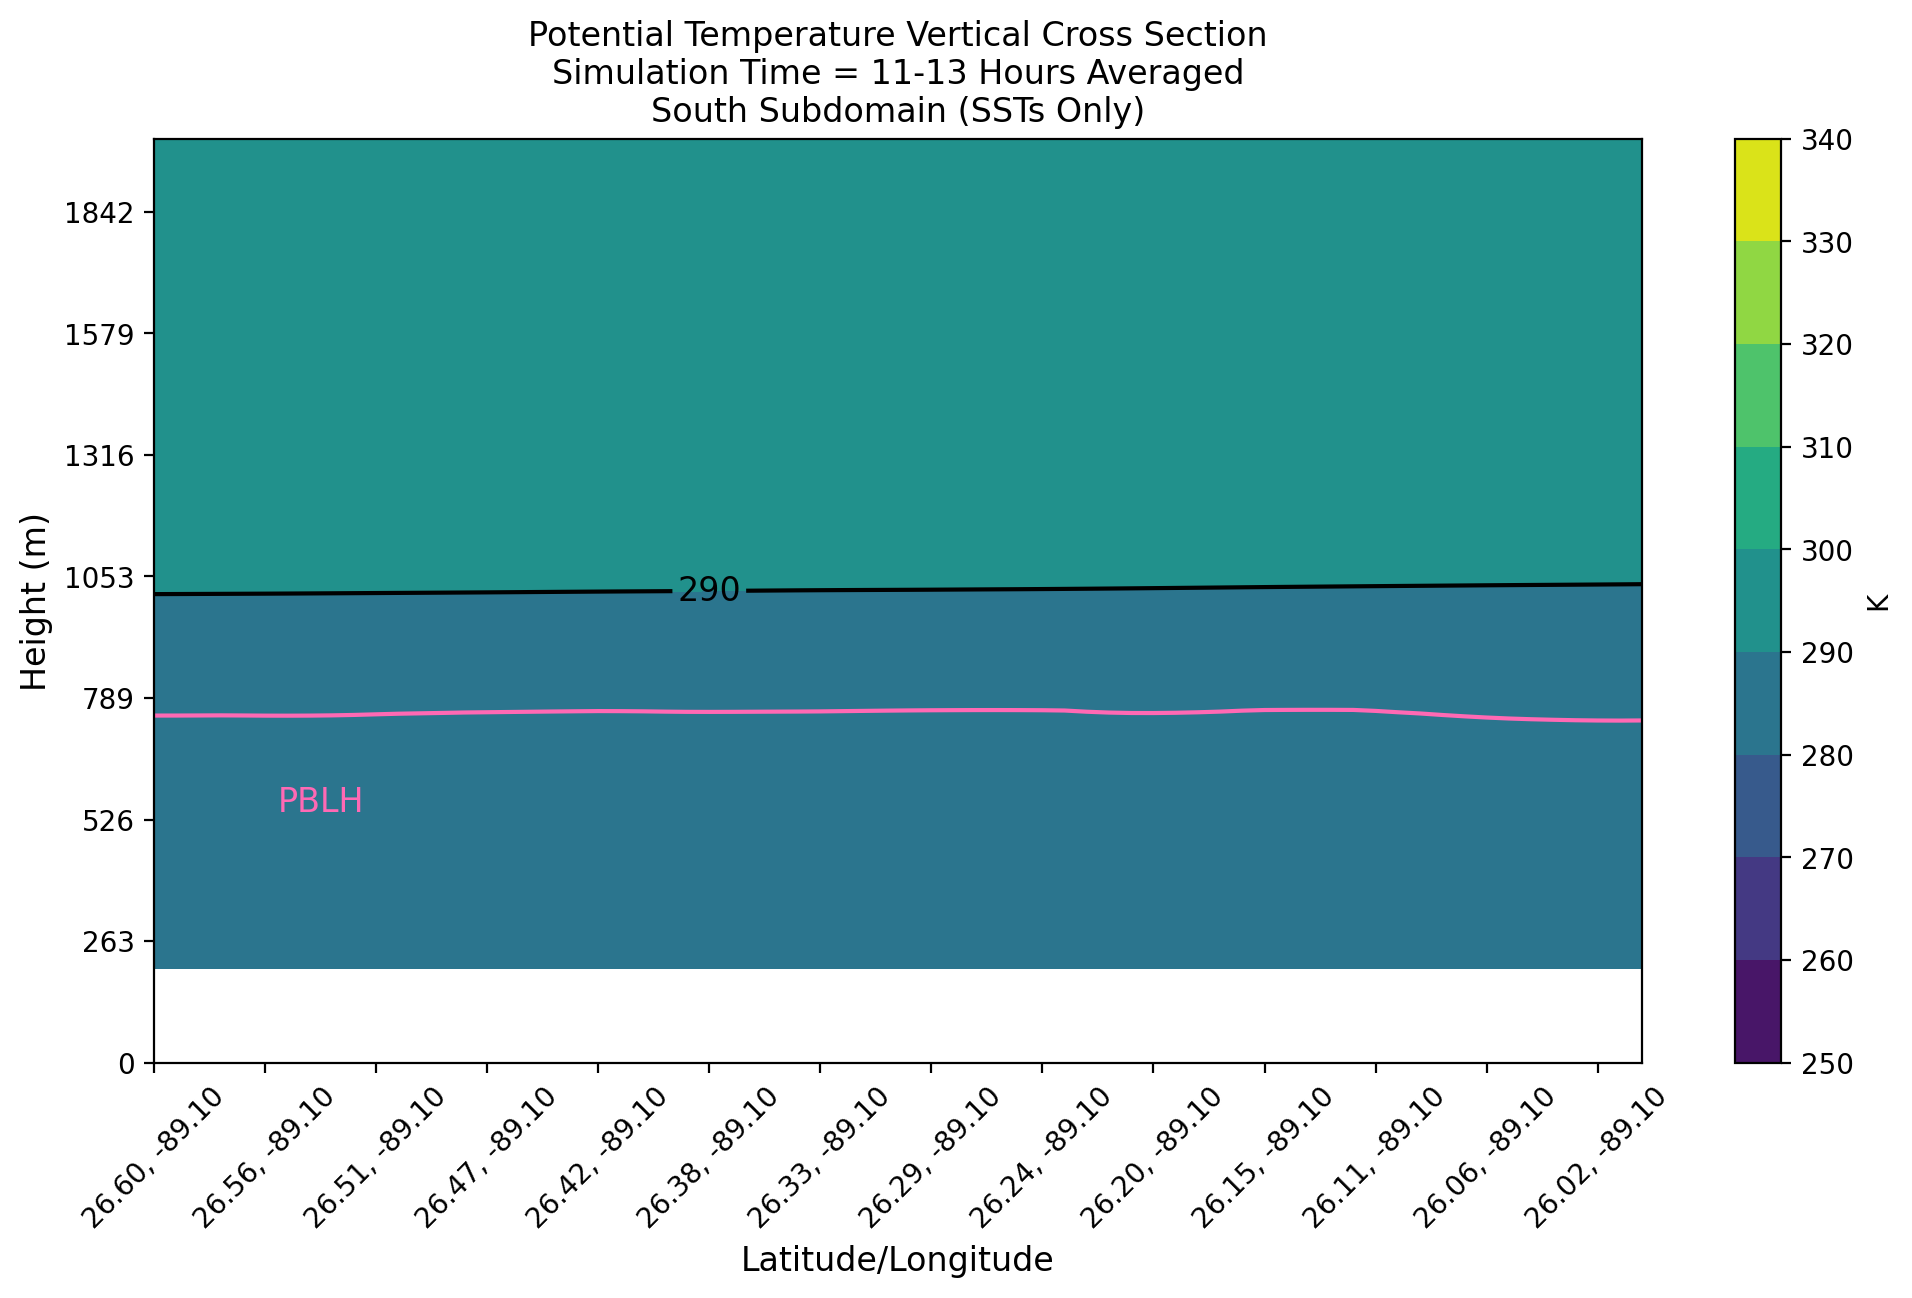

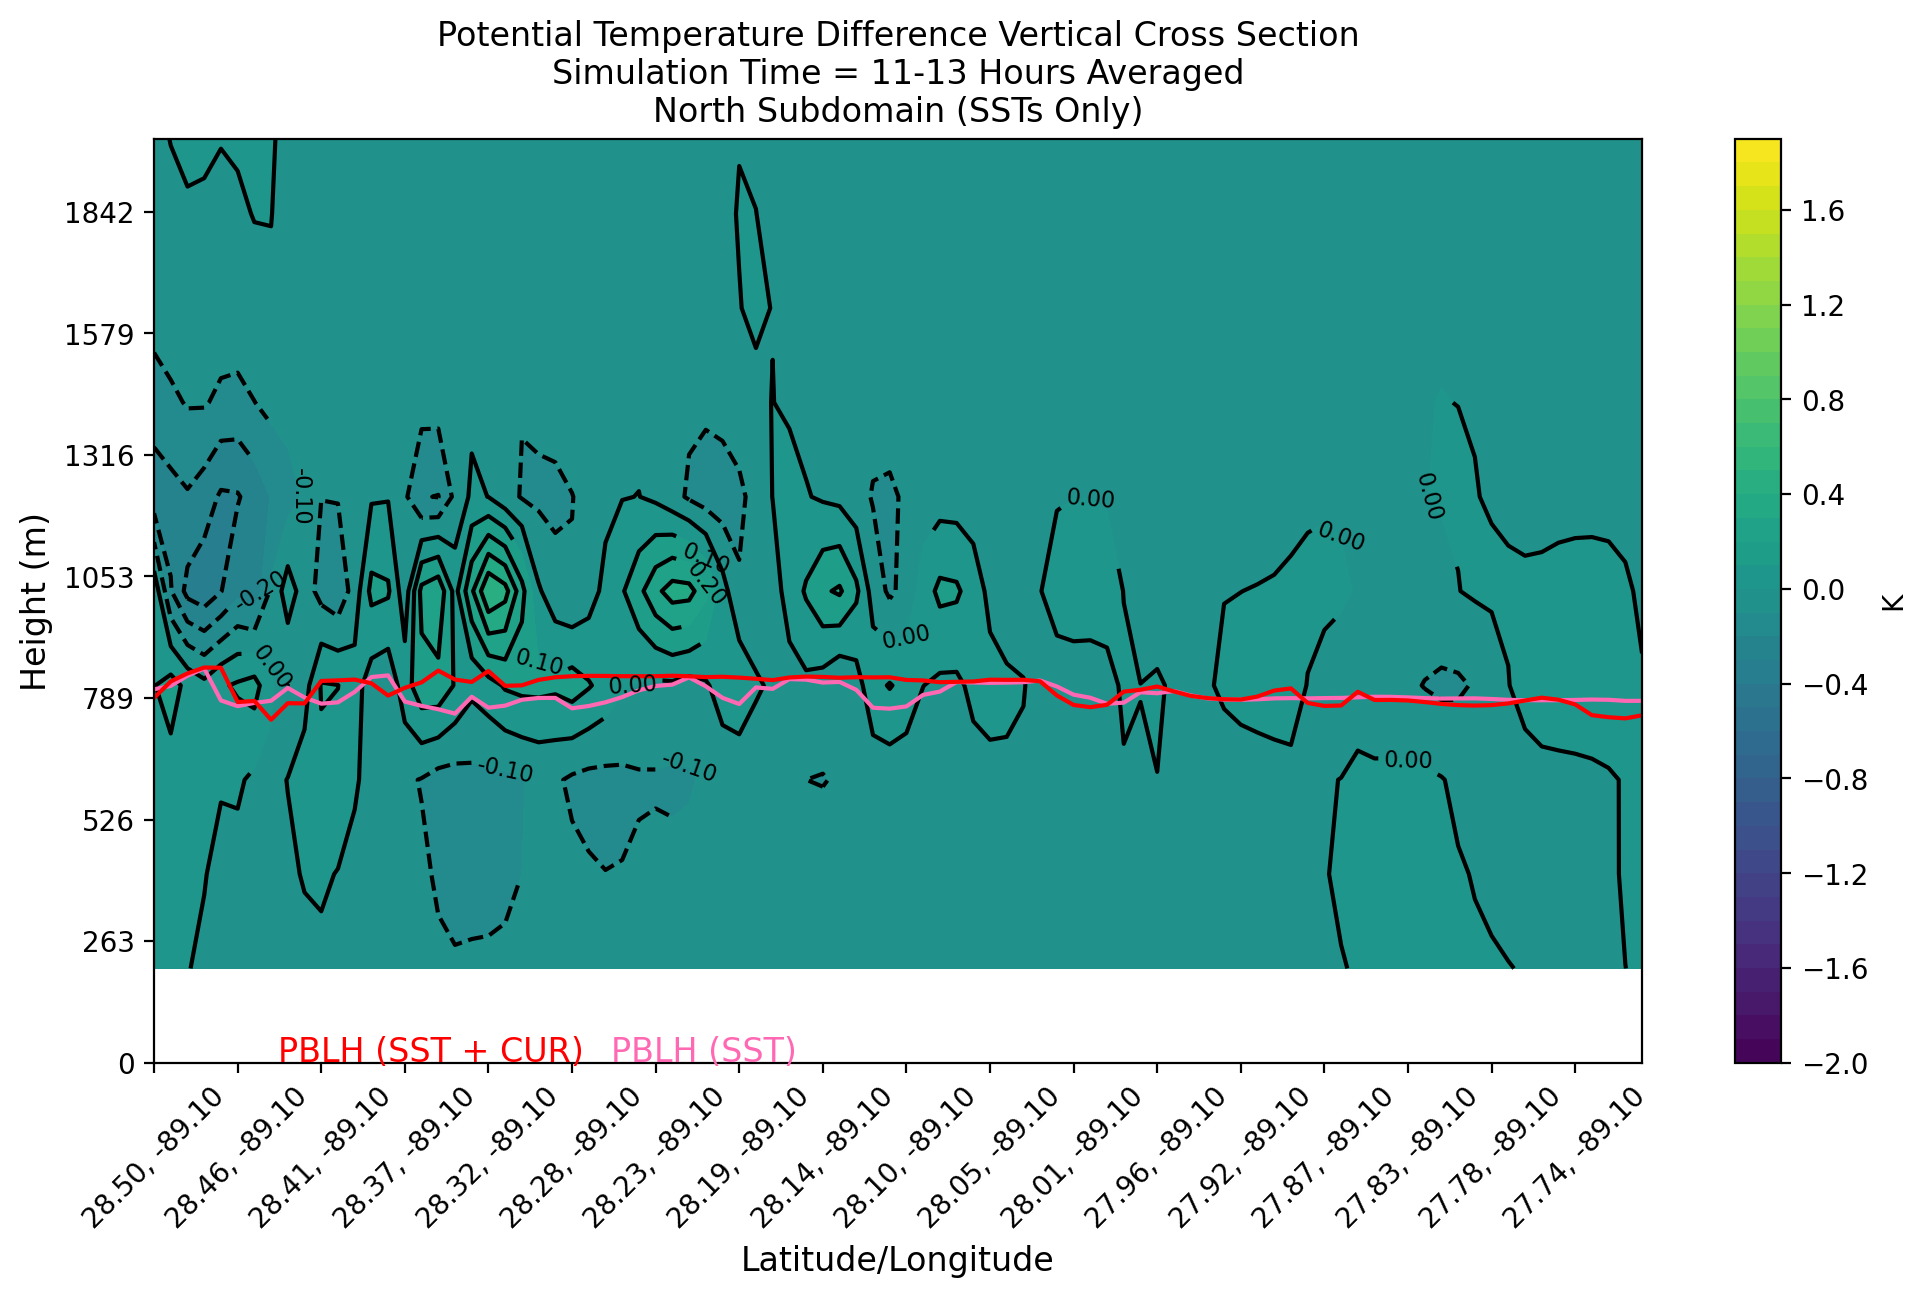

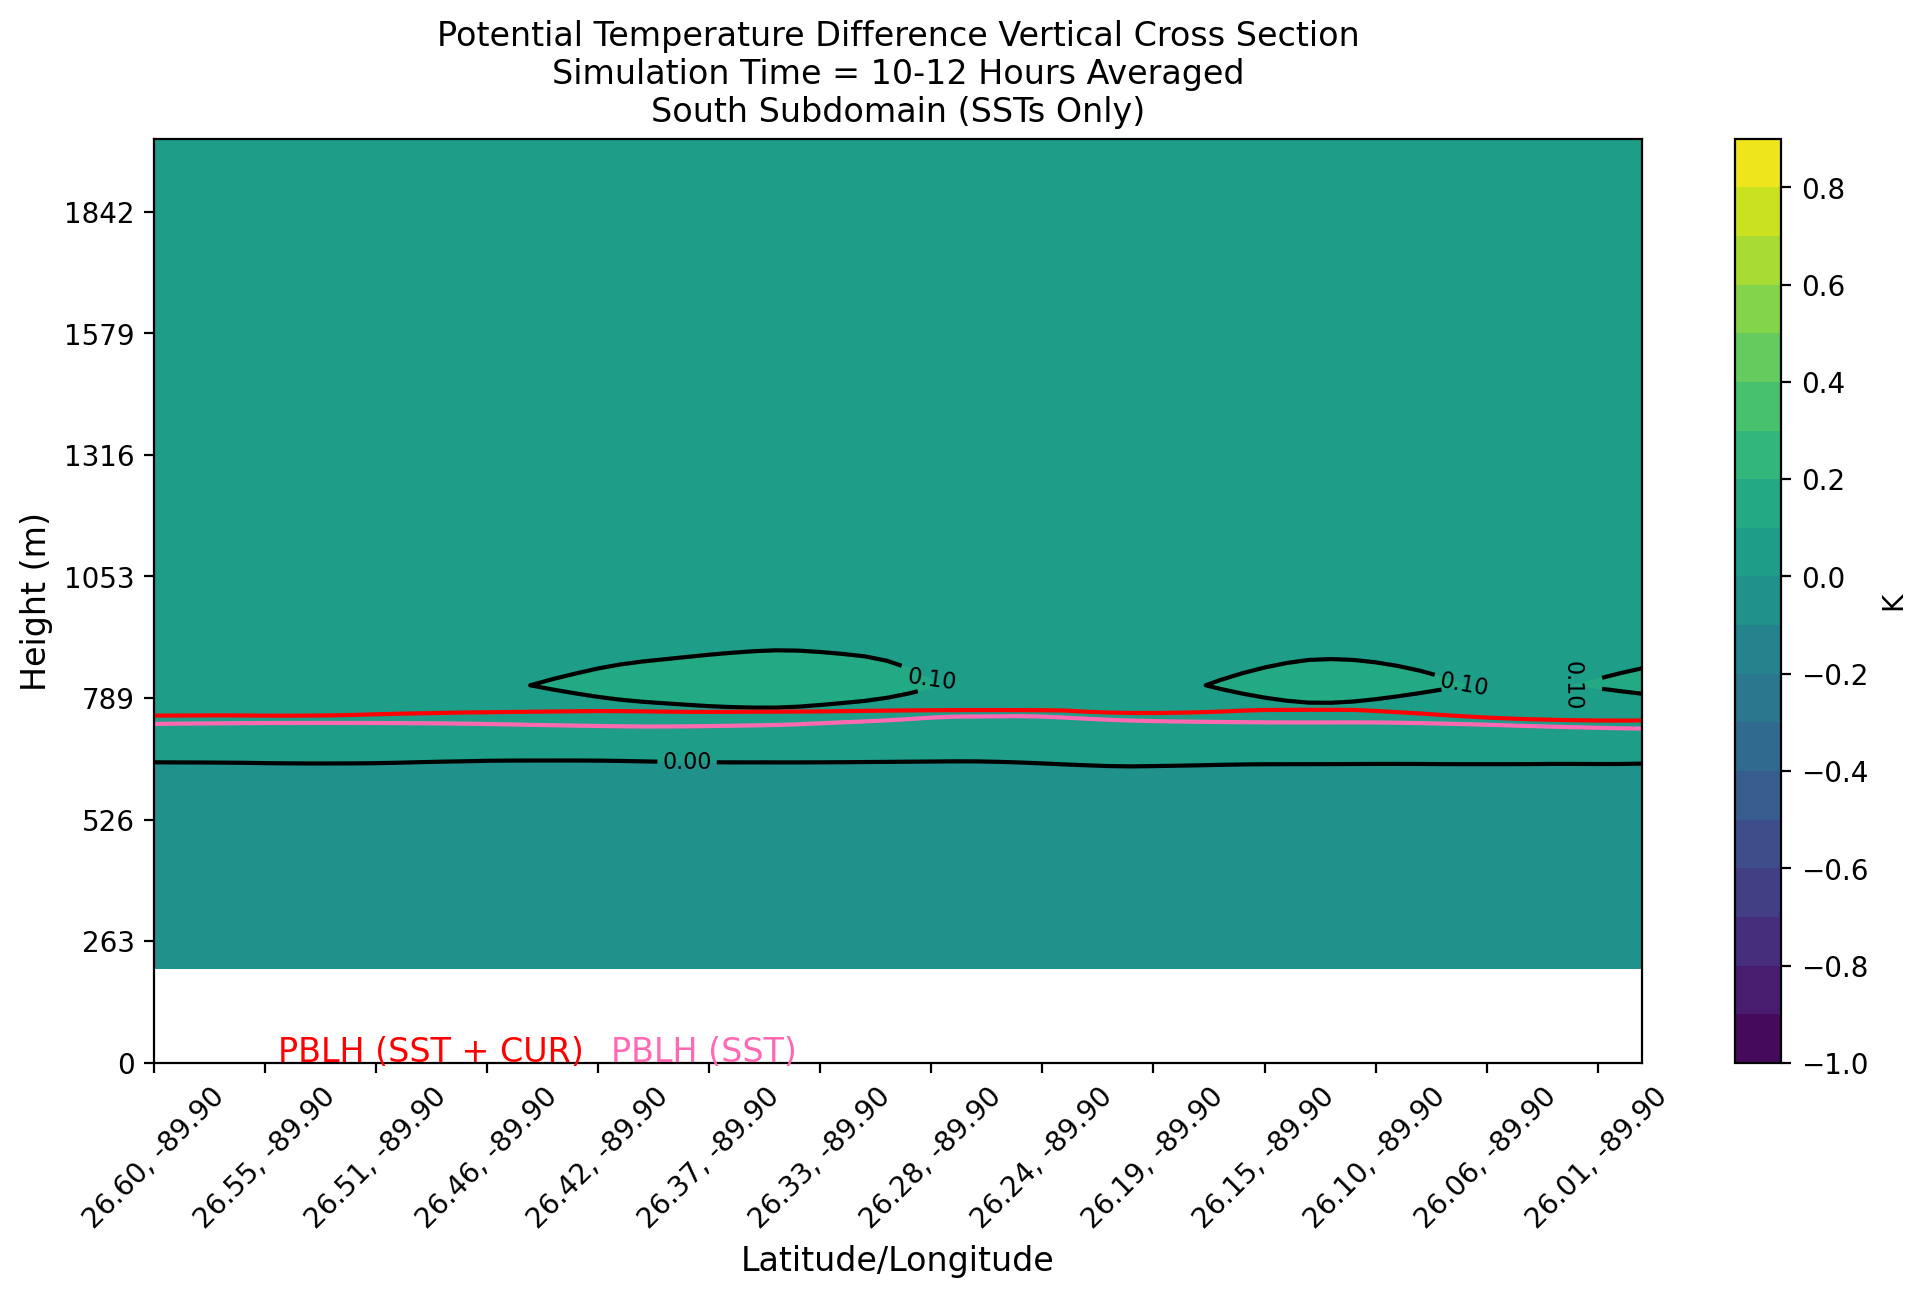

In [14]:

#CUR NORTH
z = z_cur_north
theta = cur_theta_north
pblh_line = N_pblh_line_cur

start_point = CoordPair(lat=28.5, lon=-89.1)
end_point = CoordPair(lat=27.7, lon=-89.1)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x = np.arange(coord_pairs.shape[0])
y = pblh_line

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.), colors = 'black')


plt.clabel(theta_contours_line, inline=1, fontsize=12, fmt="%i", colors = 'black')
plt.plot(x, y, color = 'red' )
ax.annotate('PBLH',xy=(100, 175), xycoords='figure points', fontsize=12, color = 'red')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0,2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Vertical Cross Section\nSimulation Time = 11-13 Hours Averaged\nNorth Subdomain (SSTs + Currents)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_thetaCross_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()


#SST NORTH
z = z_sst_north
theta = sst_theta_north
pblh_line = N_pblh_line_sst

start_point = CoordPair(lat=28.5, lon=-89.1)
end_point = CoordPair(lat=27.7, lon=-89.1)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x = np.arange(coord_pairs.shape[0])
y = pblh_line

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.), colors = 'black')


plt.clabel(theta_contours_line, inline=1, fontsize=12, fmt="%i", colors = 'black')
plt.plot(x, y, color = 'hotpink' )
ax.annotate('PBLH',xy=(100, 175), xycoords='figure points', fontsize=12, color = 'hotpink')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0, 2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Vertical Cross Section\nSimulation Time = 11-13 Hours Averaged\nNorth Subdomain (SSTs Only)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_thetaCross_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()


#CUR SOUTH
z = z_cur_south
theta = cur_theta_south
pblh_line = S_pblh_line_cur

start_point = CoordPair(lat=26.6, lon=-89.9)
end_point = CoordPair(lat=26.0, lon=-89.9)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x = np.arange(coord_pairs.shape[0])
y = pblh_line

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.), colors = 'black')


plt.clabel(theta_contours_line, inline=1, fontsize=12, fmt="%i", colors = 'black')
plt.plot(x, y, color = 'red' )
ax.annotate('PBLH',xy=(100, 175), xycoords='figure points', fontsize=12, color = 'red')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0, 2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Vertical Cross Section\nSimulation Time = 10-12 Hours Averaged\nSouth Subdomain (SSTs + Currents)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_thetaCross_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()


#SST SOUTH
z = z_sst_south
theta = sst_theta_south
pblh_line = S_pblh_line_sst

start_point = CoordPair(lat=26.6, lon=-89.1)
end_point = CoordPair(lat=26.0, lon=-89.1)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x = np.arange(coord_pairs.shape[0])
y = pblh_line

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(250.,350.,10.), colors = 'black')


plt.clabel(theta_contours_line, inline=1, fontsize=12, fmt="%i", colors = 'black')
plt.plot(x, y, color = 'hotpink' )
ax.annotate('PBLH',xy=(100, 175), xycoords='figure points', fontsize=12, color = 'hotpink')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0, 2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Vertical Cross Section\nSimulation Time = 11-13 Hours Averaged\nSouth Subdomain (SSTs Only)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_thetaCross_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#N DIFF
z = z_sst_north
theta = N_diff
pblh_line1 = N_pblh_line_cur
pblh_line2 = N_pblh_line_sst

start_point = CoordPair(lat=28.5, lon=-89.1)
end_point = CoordPair(lat=27.7, lon=-89.1)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x1 = np.arange(coord_pairs.shape[0])
y1 = pblh_line1
x2 = np.arange(coord_pairs.shape[0])
y2 = pblh_line2

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(-2.0,2.0,0.1),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(-2.0,2.0,0.1), colors = 'black')

plt.clabel(theta_contours_line, fontsize=8, fmt='%1.2f', colors = 'black')
plt.plot(x1, y1, color = 'hotpink' )
ax.annotate('PBLH (SST)',xy=(220, 85), xycoords='figure points', fontsize=12, color = 'hotpink')

plt.plot(x2, y2, color = 'red' )
ax.annotate('PBLH (SST + CUR)',xy=(100, 85), xycoords='figure points', fontsize=12, color = 'red')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0, 2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Difference Vertical Cross Section\nSimulation Time = 11-13 Hours Averaged\nNorth Subdomain (SSTs Only)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'north_thetaCross_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#S DIFF
z = z_sst_south
theta = S_diff
pblh_line1 = S_pblh_line_cur
pblh_line2 = S_pblh_line_sst

start_point = CoordPair(lat=26.6, lon=-89.9)
end_point = CoordPair(lat=26.0, lon=-89.9)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout12, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

coord_pairs = to_np(theta_cross.coords["xy_loc"])

x1 = np.arange(coord_pairs.shape[0])
y1 = pblh_line1
x2 = np.arange(coord_pairs.shape[0])
y2 = pblh_line2

theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(-1.0,1.0,0.1),cmap=get_cmap("viridis"))
plt.colorbar(theta_contours, ax=ax,  label = 'K')
theta_contours_line = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(-2.0,2.0,0.1), colors = 'black')

plt.clabel(theta_contours_line, fontsize=8, fmt='%1.2f', colors = 'black')
plt.plot(x1, y1, color = 'hotpink' )
ax.annotate('PBLH (SST)',xy=(220, 85), xycoords='figure points', fontsize=12, color = 'hotpink')

plt.plot(x2, y2, color = 'red' )
ax.annotate('PBLH (SST + CUR)',xy=(100, 85), xycoords='figure points', fontsize=12, color = 'red')

x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_yticks(np.linspace(0, 5000, 20))
ax.set_ylim(0, 2000) #900 max PBLH + 500m = 1400m + 200 m buffer = 1600m
ax.set_xticks(x_ticks[::5])
ax.set_xticklabels(x_labels[::5], rotation=45, fontsize=10)
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)
plt.title("Potential Temperature Difference Vertical Cross Section\nSimulation Time = 10-12 Hours Averaged\nSouth Subdomain (SSTs Only)")
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/Theta/'
plt.savefig(save_results_to + 'south_thetaCross_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()
